# Project - Statistical Methods For Decision Making

### Marks: 60 points

# Problem Statement 1 - Wholesale Customers Analysis

### Business Context

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of productsin 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

### Objective

They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description



1. Buyer/Spender- ID's of customers
2. Region- Region of the distributor
3. Fresh- spending on Fresh Vegetables
4. Milk- spending on milk
5. Grocery- spending on grocery
6. Frozen- spending on frozen food
7. Detergents_paper- spending on detergents and toilet paper
8. Delicatessen- spending on instant foods





## Let us start by importing the required libraries

In [305]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats as st
from scipy.stats import iqr #To calculate the IQR - Interquartile Range
import statistics as stat # To calculate the MODE
from statistics import stdev # To calculate the standard deviation
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [307]:
# Read the data
df = pd.read_csv('/Users/AnkurPal/downloads/Wholesale Customer.csv') ## Fill the blank to read the data

In [308]:
# Returns the first 5 rows
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


## Data Overview

#### How many rows and columns are present in the data?

In [311]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(440, 9)

####  What are the datatypes of the different columns in the dataset?

In [313]:
# Check the datatypes
df.dtypes #Write an appropriate function to check teh data type of each column

Buyer/Spender        int64
Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64
dtype: object

#### Are there any missing values in the data?

In [315]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

#### Check the statistical summary of the data.

In [317]:
# Get the summary statistics of the numerical data
df.describe()  ## Write the appropriate function to print the statistical summary of the data (Hint - you have seen this in the case studies before)

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Explore all the categorical variables and provide observations on their frequency.

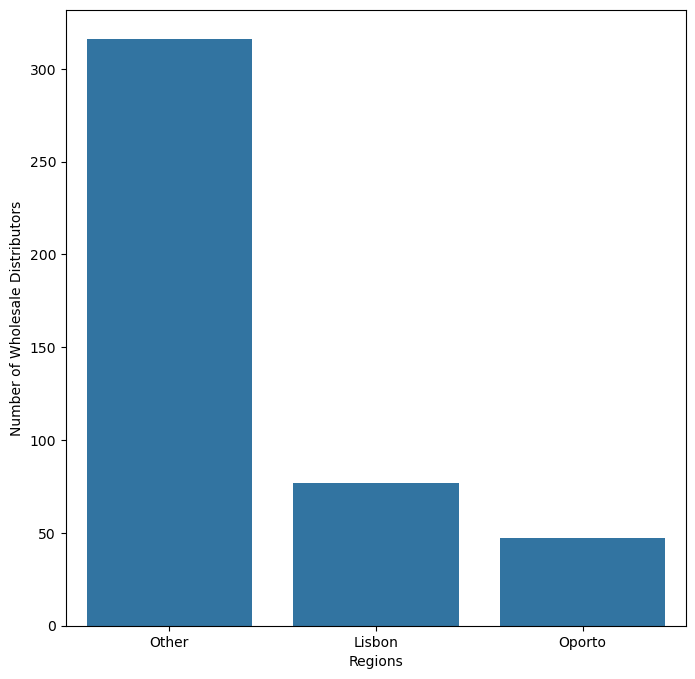

In [321]:
plt.figure(figsize=(8, 8))

sns.countplot(data=df, x='Region')  ## Complete the code to plot the graph
plt.xlabel('Regions')
plt.ylabel('Number of Wholesale Distributors')
plt.show()

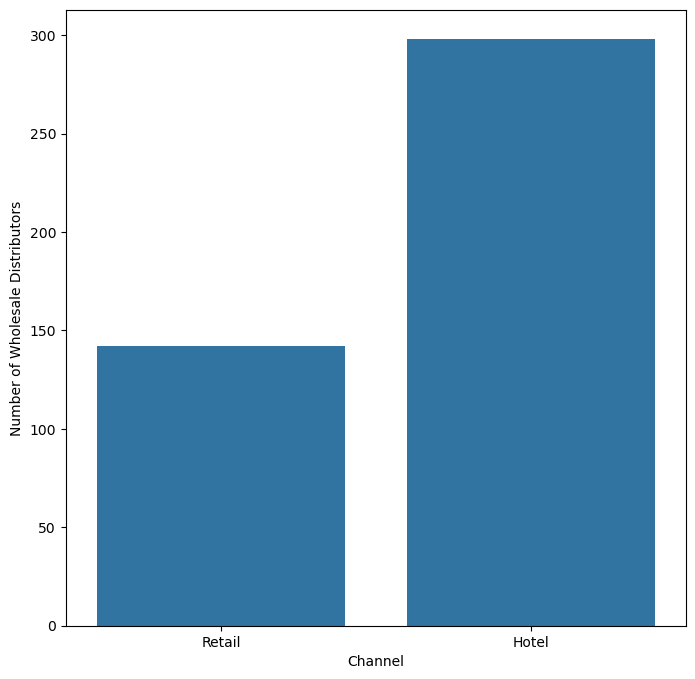

In [322]:
plt.figure(figsize=(8, 8))

sns.countplot(data=df, x='Channel')  ## Complete the code to plot the graph
plt.xlabel('Channel')
plt.ylabel('Number of Wholesale Distributors')
plt.show()

#### Find the distribution of spending across all categories

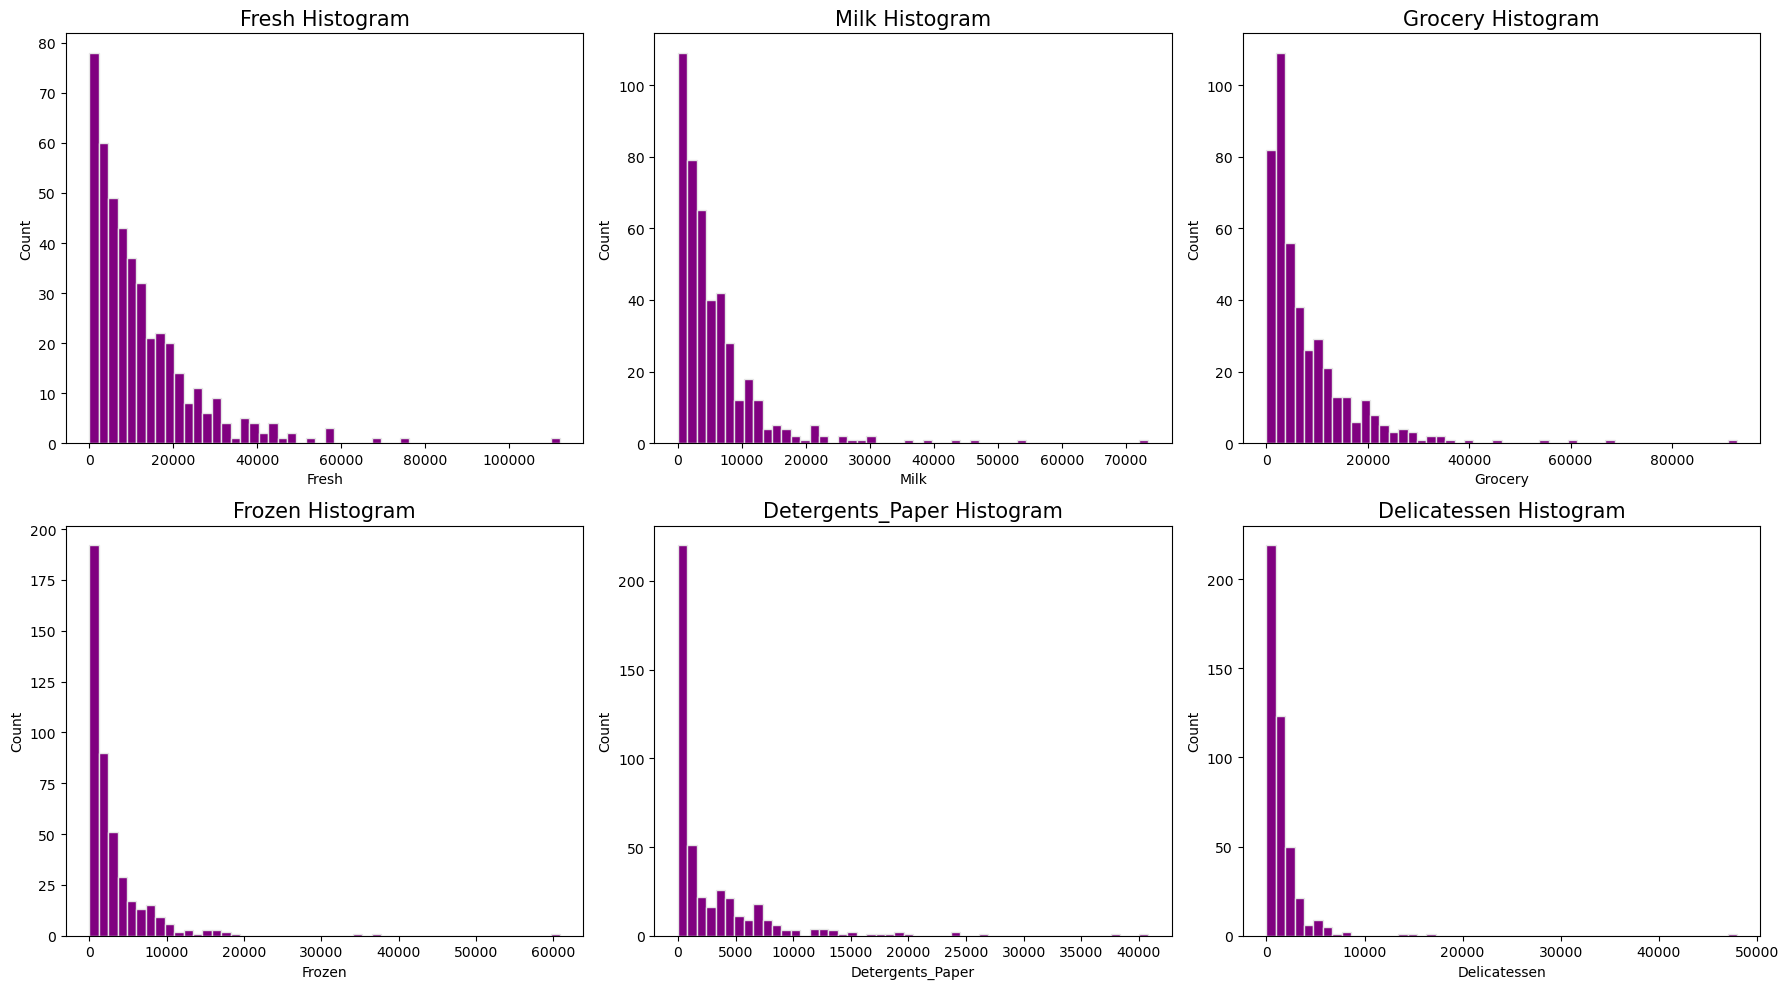

In [324]:
import matplotlib.pyplot as plt

cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i in range(len(cols)):
    ax = axes[i // 3, i % 3]
    col = cols[i]
    ax.hist(df[col], bins=50, edgecolor='#E6E6E6', color='Purple')  ## Plot histogram
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(col + " Histogram", fontsize=15)

plt.tight_layout()
plt.show()


#### Are there any outliers in the data?

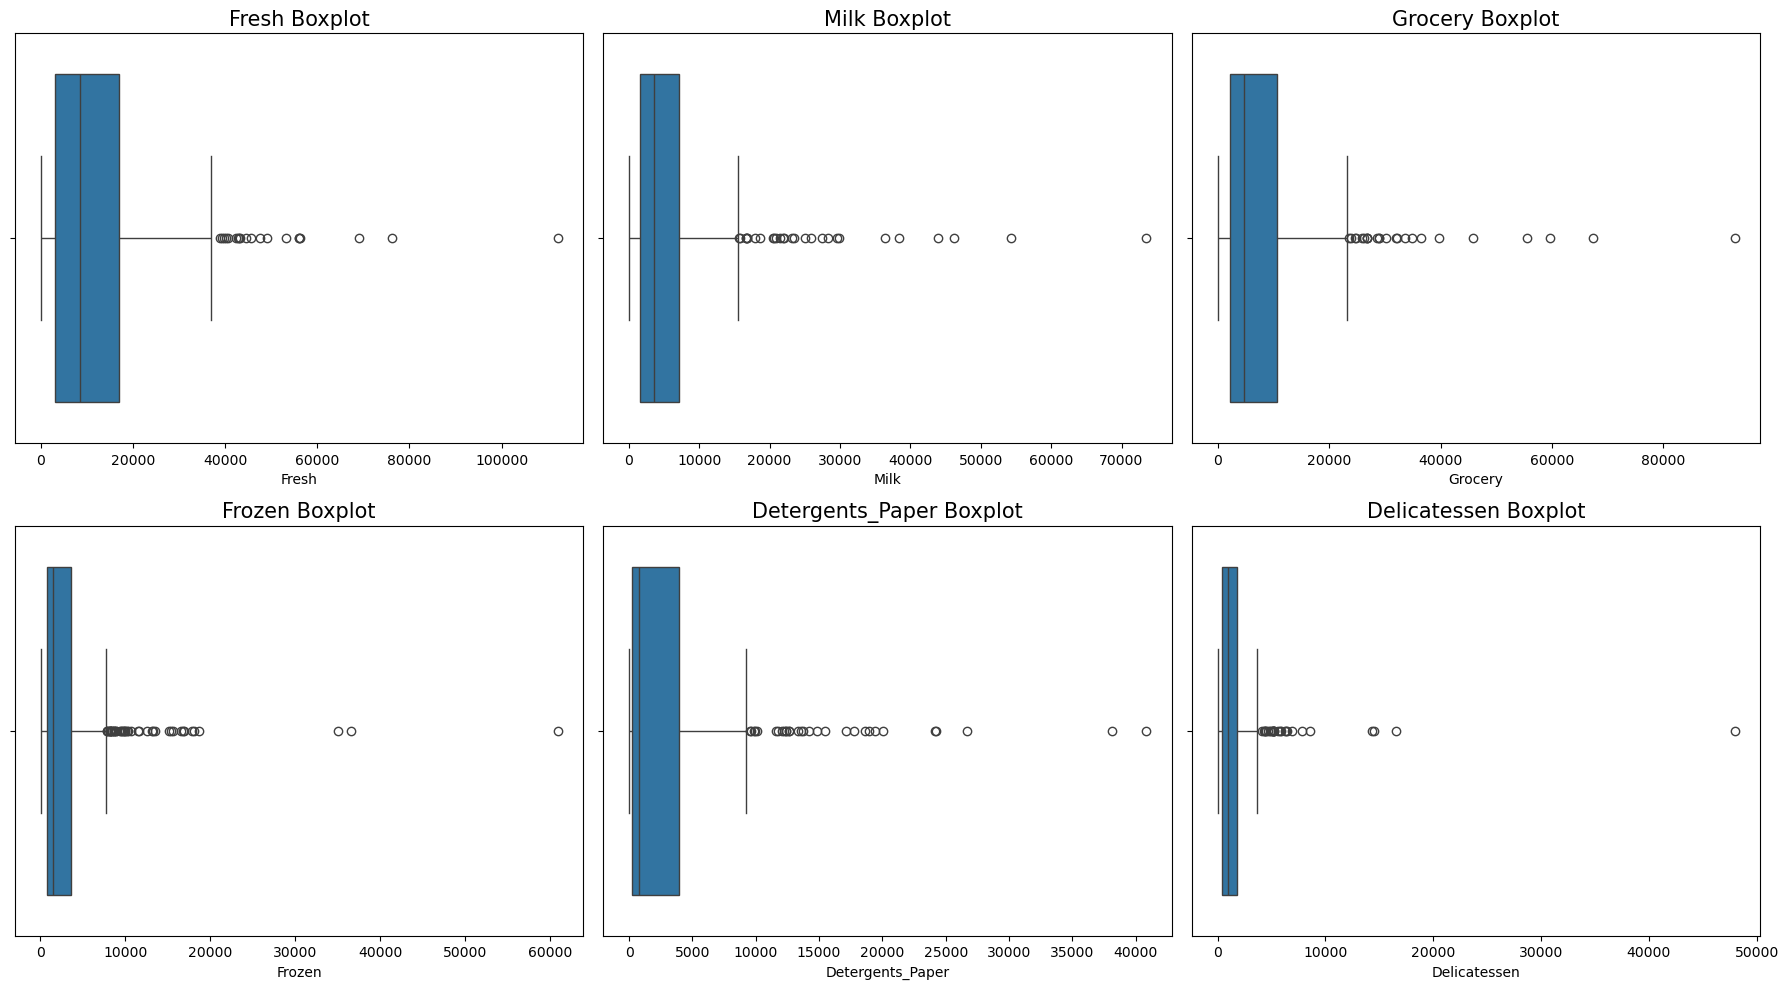

In [326]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i in range(len(cols)):
    ax = axes[i // 3, i % 3]
    col = cols[i]
    sns.boxplot(data=df, x=col, orient="v", ax=ax) ## Complete the code to create boxplot
    ax.set_title(col + " Boxplot", fontsize=15)

plt.tight_layout()
plt.show()


### Multivariate Analysis

**We will create a new column of total of spendings by adding the 6 different varieties.**

In [329]:
## Adding row totals to the data frame
df['Total'] = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum(axis=1)
df.head()


,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


####  Find the total spending across all regions

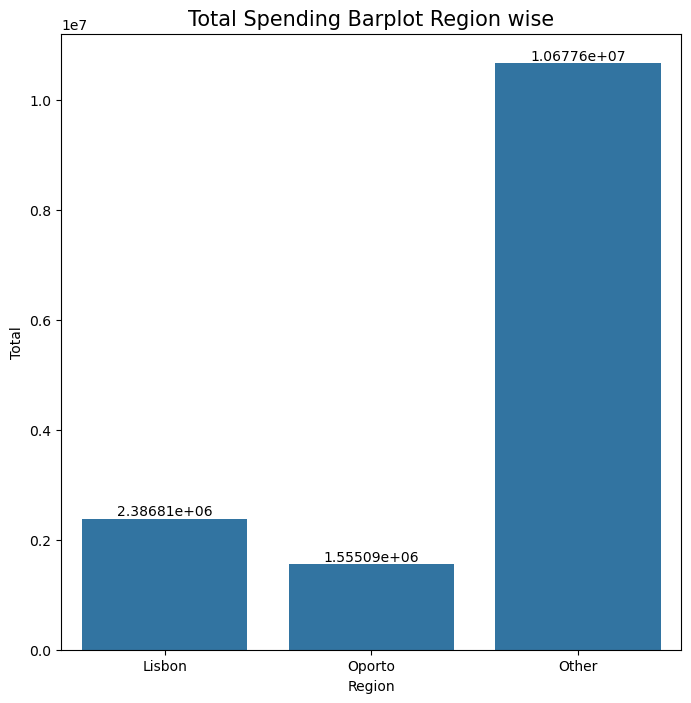

In [331]:
plt.figure(figsize=(8, 8))

RegionAggregated = df.groupby("Region")["Total"].sum().reset_index()  ## Create a temporary dataframe
ax = sns.barplot(x="Region", y="Total", data=RegionAggregated)        ## Plot a bar graph
ax.bar_label(ax.containers[0])
plt.title("Total Spending Barplot Region wise", fontsize=15)
plt.show()


#### Find the total spending of all the channels

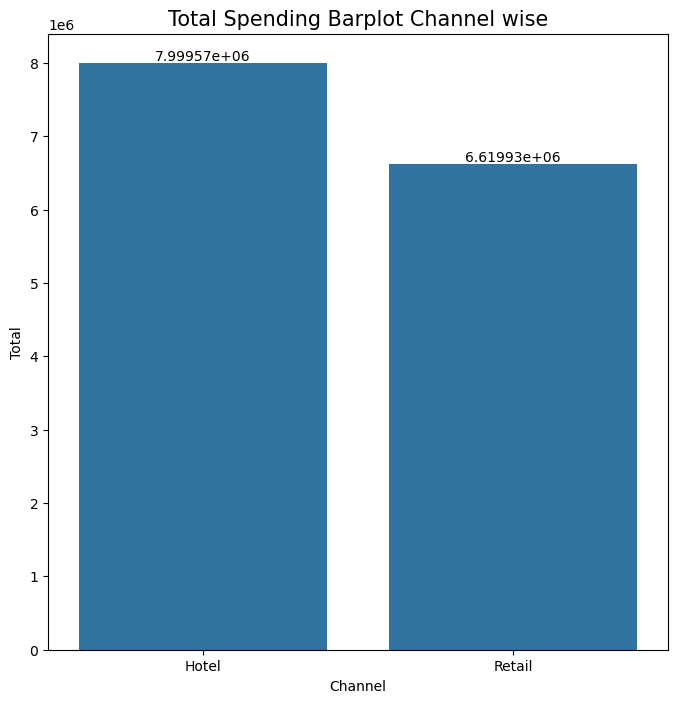

In [333]:
plt.figure(figsize=(8, 8))

# Create a temporary dataframe
ChannelAggregated = df.groupby("Channel")["Total"].sum().reset_index()

# Plot a bar graph
ax = sns.barplot(x="Channel", y="Total", data=ChannelAggregated)

# Add value labels
ax.bar_label(ax.containers[0])
plt.title("Total Spending Barplot Channel wise", fontsize=15)
plt.show()


#### Find the total spending across regions via different channels

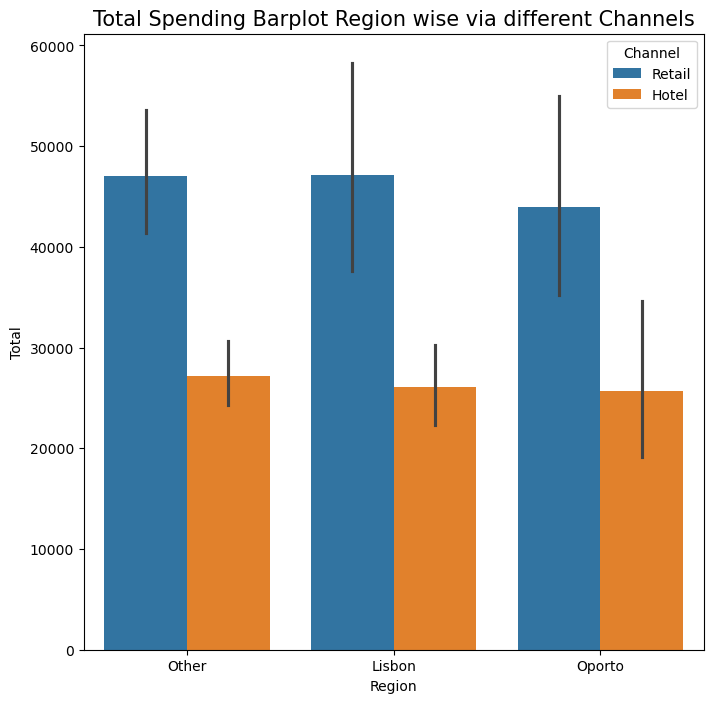

In [335]:
plt.figure(figsize=(8, 8))
sns.barplot(x='Region', y='Total', hue='Channel', data=df)
plt.title("Total Spending Barplot Region wise via different Channels", fontsize=15)
plt.show()


In [336]:
# Now drop the Total column
df.drop('Total', axis=1, inplace=True)


#### Find the total spending on each of the categories across different region and channels

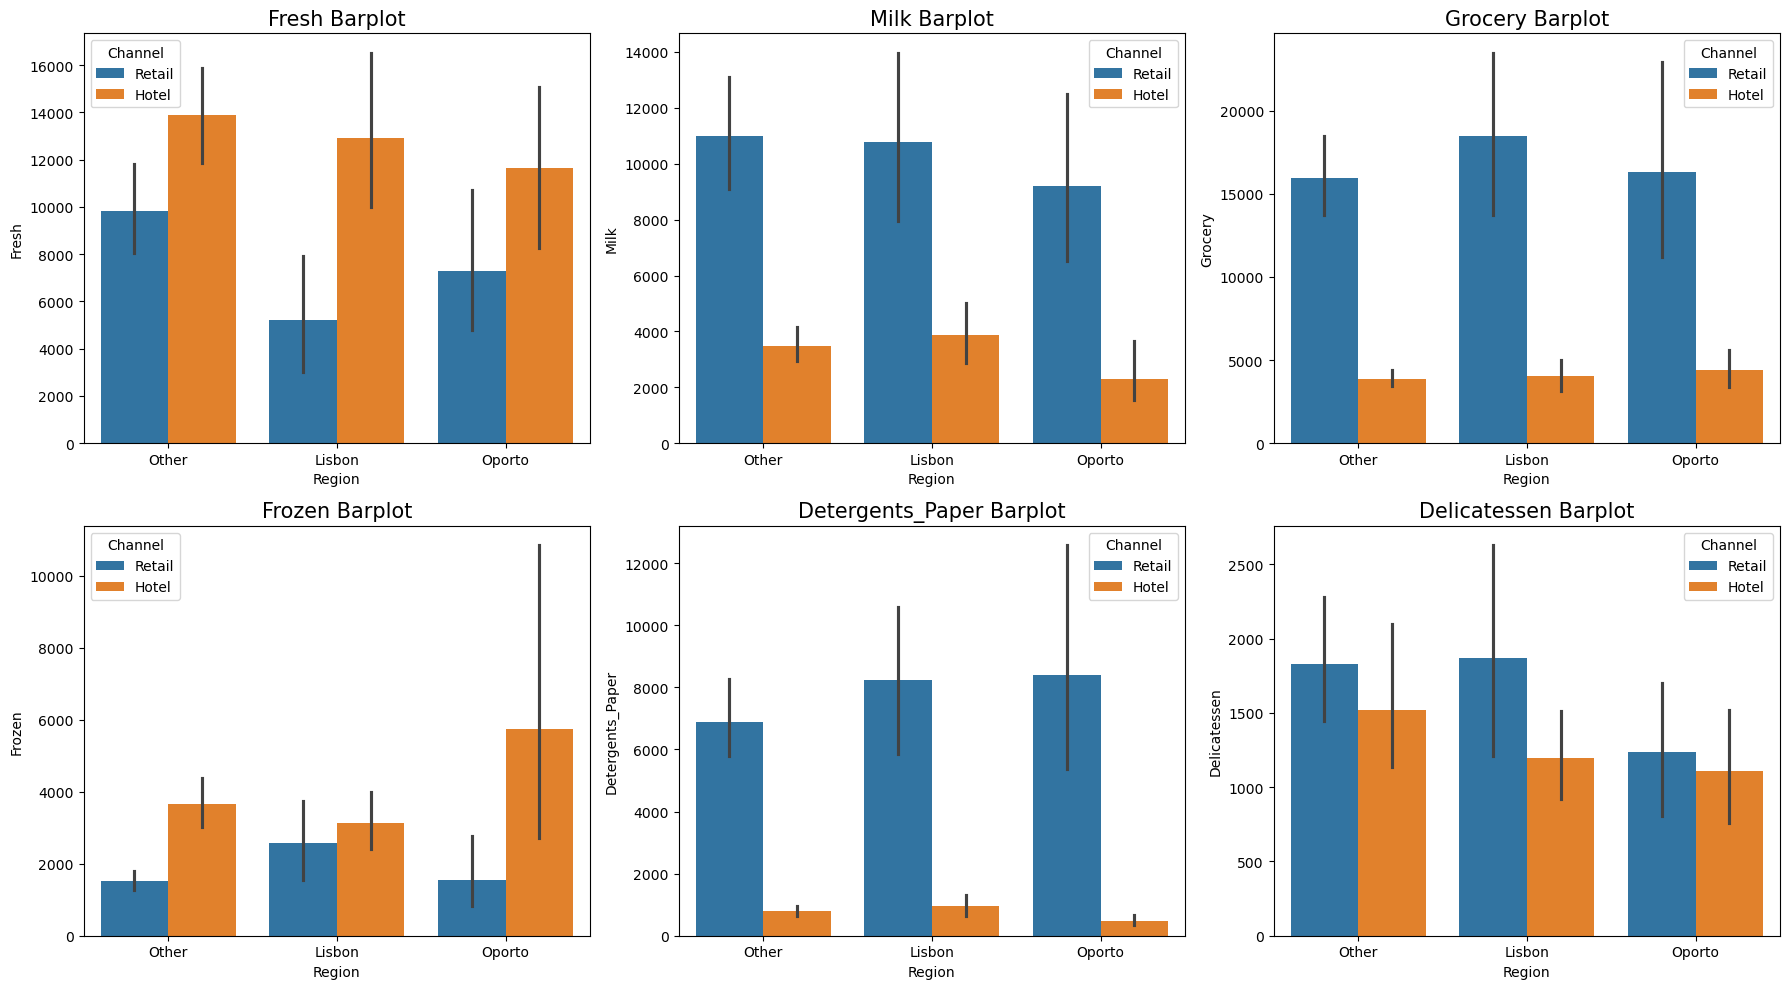

In [338]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i in range(len(cols)):
    ax = axes[i // 3, i % 3]
    col = cols[i]
    sns.barplot(data=df, x='Region', y=col, hue='Channel', ax=ax)
    ax.set_title(col + " Barplot", fontsize=15)

plt.tight_layout()
plt.show()


#### Do the item varieties show similar behavior across region and channel?

Hint: There are 6 different varieties of items in the data.

**We will subset the dataset with respect to region and channel.**

In [341]:
# Channel wise data subset
Retail = df[df['Channel'] == "Retail"]  ## Create a temporary dataframe for Retail
Hotel = df[df['Channel'] == "Hotel"]    ## Create a temporary dataframe for Hotel


**To check the behaivour of the item varieties, we will check the statistical summary.**

In [343]:
Retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,142.00,183.00,132.14,1.00,61.25,166.50,303.75,438.00
Fresh,142.00,8904.32,8987.71,18.00,2347.75,5993.50,12229.75,44466.00
Milk,142.00,10716.50,9679.63,928.00,5938.00,7812.00,12162.75,73498.00
Grocery,142.00,16322.85,12267.32,2743.00,9245.25,12390.00,20183.50,92780.00
Frozen,142.00,1652.61,1812.80,33.00,534.25,1081.00,2146.75,11559.00
Detergents_Paper,142.00,7269.51,6291.09,332.00,3683.50,5614.50,8662.50,40827.00
Delicatessen,142.00,1753.44,1953.80,3.00,566.75,1350.00,2156.00,16523.00


In [344]:
Hotel.describe()  ## Complete the code to perform decriptive analysis

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,298.00,298.00,298.00,298.00,298.00,298.00,298.00
mean,238.37,13475.56,3451.72,3962.14,3748.25,790.56,1415.96
std,120.91,13831.69,4352.17,3545.51,5643.91,1104.09,3147.43
min,4.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,137.25,4070.25,1164.50,1703.75,830.00,183.25,379.00
50%,241.50,9581.50,2157.00,2684.00,2057.50,385.50,821.00
75%,344.50,18274.75,4029.50,5076.75,4558.75,899.50,1548.00
max,440.00,112151.00,43950.00,21042.00,60869.00,6907.00,47943.00


In [345]:
# Region wise data subset
Lisbon = df[df['Region'] == "Lisbon"]  ## Create a temporary dataframe for Lisbon
Oporto = df[df['Region'] == "Oporto"]  ## Create a temporary dataframe for Oporto
Other = df[df['Region'] == "Other"]    ## Create a temporary dataframe for Other


**To check the behaivour of the varities, we will do the descriptive analytics**

In [347]:
Lisbon.describe()  ## Complete the code to perform decriptive analysis

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,235.00,11101.73,5486.42,7403.08,3000.34,2651.12,1354.90
std,22.37,11557.44,5704.86,8496.29,3092.14,4208.46,1345.42
min,197.00,18.00,258.00,489.00,61.00,5.00,7.00
25%,216.00,2806.00,1372.00,2046.00,950.00,284.00,548.00
50%,235.00,7363.00,3748.00,3838.00,1801.00,737.00,806.00
75%,254.00,15218.00,7503.00,9490.00,4324.00,3593.00,1775.00
max,273.00,56083.00,28326.00,39694.00,18711.00,19410.00,6854.00


In [348]:
Oporto.describe()  ## Complete the code to perform decriptive analysis

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,47.00,47.00,47.00,47.00,47.00,47.00,47.00
mean,317.00,9887.68,5088.17,9218.60,4045.36,3687.47,1159.70
std,13.71,8387.90,5826.34,10842.75,9151.78,6514.72,1050.74
min,294.00,3.00,333.00,1330.00,131.00,15.00,51.00
25%,305.50,2751.50,1430.50,2792.50,811.50,282.50,540.50
50%,317.00,8090.00,2374.00,6114.00,1455.00,811.00,898.00
75%,328.50,14925.50,5772.50,11758.50,3272.00,4324.50,1538.50
max,340.00,32717.00,25071.00,67298.00,60869.00,38102.00,5609.00


In [349]:
Other.describe()  ## Complete the code to perform decriptive analysis

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,316.00,316.00,316.00,316.00,316.00,316.00,316.00
mean,202.61,12533.47,5977.09,7896.36,2944.59,2817.75,1620.60
std,143.62,13389.21,7935.46,9537.29,4260.13,4593.05,3232.58
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,79.75,3350.75,1634.00,2141.50,664.75,251.25,402.00
50%,158.50,8752.50,3684.50,4732.00,1498.00,856.00,994.00
75%,361.25,17406.50,7198.75,10559.75,3354.75,3875.75,1832.75
max,440.00,112151.00,73498.00,92780.00,36534.00,40827.00,47943.00


#### Is there any correlation between the different item varieties in terms of spending?

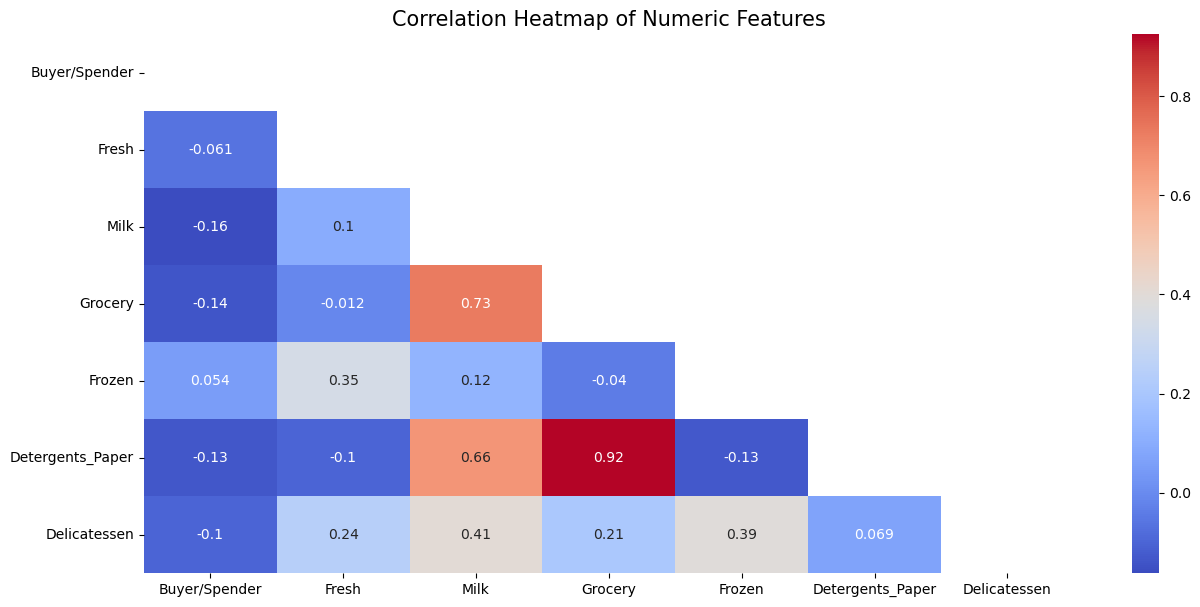

In [351]:
# Compute correlation on numeric columns only
numeric_df = df.select_dtypes(include='number')

sns.color_palette("tab10")
plt.figure(figsize=(15, 7))
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))
sns.heatmap(numeric_df.corr(), annot=True, mask=mask, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features", fontsize=15)
plt.show()


## Conclusions and Recommendations

#### What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

#### Conclusions:

1. Spending Patterns by Product:

The Grocery, Milk, and Fresh categories showed the highest median and mean spending.

Detergents_Paper and Delicatessen had the lowest overall spending, indicating niche or supplementary purchases.

Significant right-skewed distributions in most spending categories suggest a few customers spend far more than the rest (possible outliers or bulk buyers).


2. Outlier Detection:
   
Boxplots revealed outliers in Fresh, Milk, Grocery, and Frozen, confirming that some buyers purchase in much larger quantities.



3. Regional Insights:

Lisbon has the highest overall spending, followed by Other and then Oporto.

Spending patterns vary significantly by region, especially in Fresh and Grocery categories.


4. Channel-wise Insights:
   
The Retail channel has significantly higher total spending than the Hotel channel.

For almost every product category, Retail customers outspend Hotel customers.


5. Correlation Insights:
   
Strong positive correlation between:

    Grocery and Detergents_Paper (~0.9) ➝ suggests stores buying in bulk for retail resale.

    Milk, Grocery, and Detergents_Paper form a tightly linked spending cluster.

Fresh and Frozen show weaker correlations with other categories, indicating distinct purchasing behavior (e.g., perishables or specialized needs).


#### Recommendations:

1. Segment the Customers:

Use clustering techniques (like K-Means) to segment customers based on spending habits — e.g., high spenders vs. niche category buyers — and tailor marketing strategies.

2. Region-Based Promotions:

Focus marketing and stocking efforts on Lisbon, as it has the highest total demand.

Oporto shows relatively lower spending — investigate whether it's due to supply issues, fewer stores, or weaker relationships with customers.

3. Channel Optimization:

The Retail channel is more profitable. Prioritize Retail in sales strategies, but also explore why Hotel spending lags — perhaps bulk packages or tailored offerings for hotels can improve uptake.

4. Bundle Commonly Bought Items:

Based on the high correlation between Grocery, Milk, and Detergents_Paper, consider offering bundle deals or discounts on these categories together.

5. Outlier Management:

Identify and understand high-spending customers. These may be strategic partners or large clients — consider offering them loyalty benefits or exclusive deals.


6. Demand Forecasting:

Based on historical demand patterns, use forecasting models to optimize inventory levels — especially for fast-moving categories like Milk and Grocery.



# Problem Statement 2 - Education - Post 12th Standard

### Objective

The objective of this analysis is to gain insights into the characteristics of colleges and answer key questions related to the educational landscape. By understanding the data, we aim to inform strategies for improving the quality of education and enhancing the overall college experience. The analysis will provide valuable insights and recommendations for stakeholders in the education sector.

### Data Description

*  Names: Names of various university and colleges
*  Apps: Number of applications received
*  Accept: Number of applications accepted
*  Enroll: Number of new students enrolled
*  Top10perc: Percentage of new students from top 10% of Higher Secondary class
*  Top25perc: Percentage of new students from top 25% of Higher Secondary class
*  F.Undergrad: Number of full-time undergraduate students
*  P.Undergrad: Number of part-time undergraduate students
*  Outstate: Number of students for whom the particular college or university is Out-of-state tuition
*  Room.Board: Cost of Room and board
*  Books: Estimated book costs for a student
*  Personal: Estimated personal spending for a student
*  PhD: Percentage of faculties with Ph.D.’s
*  Terminal: Percentage of faculties with terminal degree
*  S.F.Ratio: Student/faculty ratio
*  perc.alumni: Percentage of alumni who donate
*  Expend: The Instructional expenditure per student
*  Grad.Rate: Graduation rate

## Let us start by importing the required libraries

In [362]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

## Understanding the structure of the data

In [364]:
# Read the data
df = pd.read_csv('/Users/AnkurPal/downloads/Education - Post 12th Standard (1).csv') ## Fill the blank to read the data
# Returns the first 5 rows
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


#### How many rows and columns are present in the data?

In [366]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(777, 18)

####  What are the datatypes of the different columns in the dataset?

In [368]:
df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

#### Are there any missing values in the data?

In [370]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

#### Check the statistical summary of the data.Which Region and which Channel seems to be spend more? Which Region and which Channel seems to spend less?

In [372]:
# Get the summary statistics of the numerical data
df.describe().T ## Write the appropriate function to print the statistical summary of the data (Hint - you have seen this in the case studies before)

,count,mean,std,min,25%,50%,75%,max
Apps,777.00,3001.64,3870.20,81.00,776.00,1558.00,3624.00,48094.00
Accept,777.00,2018.80,2451.11,72.00,604.00,1110.00,2424.00,26330.00
Enroll,777.00,779.97,929.18,35.00,242.00,434.00,902.00,6392.00
Top10perc,777.00,27.56,17.64,1.00,15.00,23.00,35.00,96.00
Top25perc,777.00,55.80,19.80,9.00,41.00,54.00,69.00,100.00
F.Undergrad,777.00,3699.91,4850.42,139.00,992.00,1707.00,4005.00,31643.00
P.Undergrad,777.00,855.30,1522.43,1.00,95.00,353.00,967.00,21836.00
Outstate,777.00,10440.67,4023.02,2340.00,7320.00,9990.00,12925.00,21700.00
Room.Board,777.00,4357.53,1096.70,1780.00,3597.00,4200.00,5050.00,8124.00
Books,777.00,549.38,165.11,96.00,470.00,500.00,600.00,2340.00


#### Drop the column which does not exhibit any value

In [374]:
# Safe drop (only if it exists, and correct DataFrame name)
if 'Names' in df.columns:
    df.drop('Names', axis=1, inplace=True)


## Exploratory Data Analysis (EDA)

### Univariate Analysis

Apps
Skew : 3.72


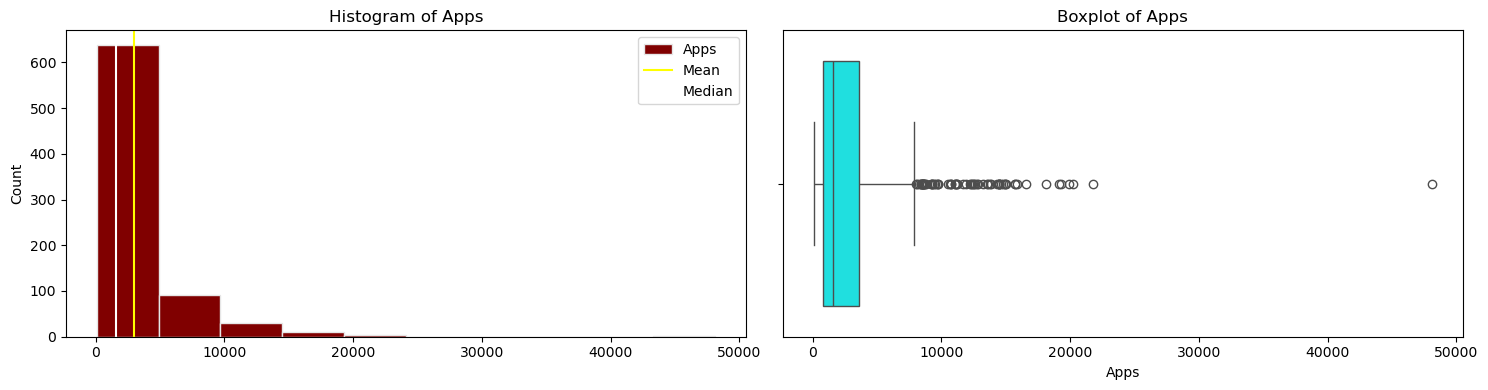

Accept
Skew : 3.42


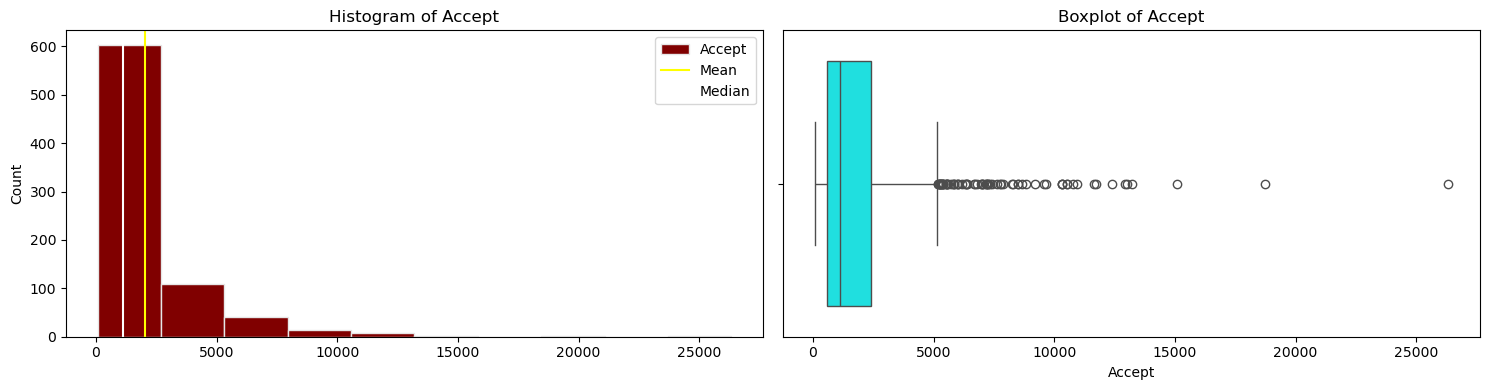

Enroll
Skew : 2.69


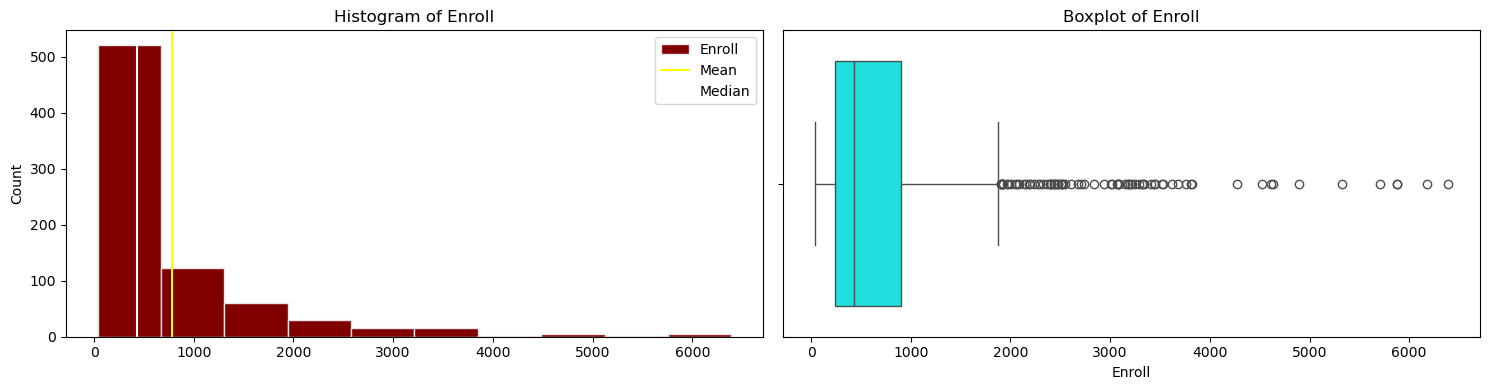

Top10perc
Skew : 1.41


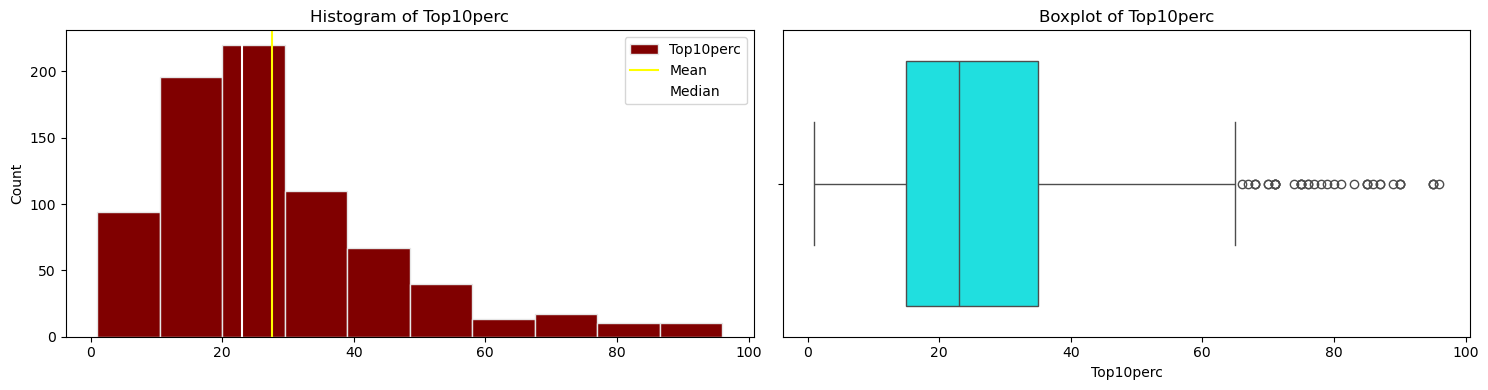

Top25perc
Skew : 0.26


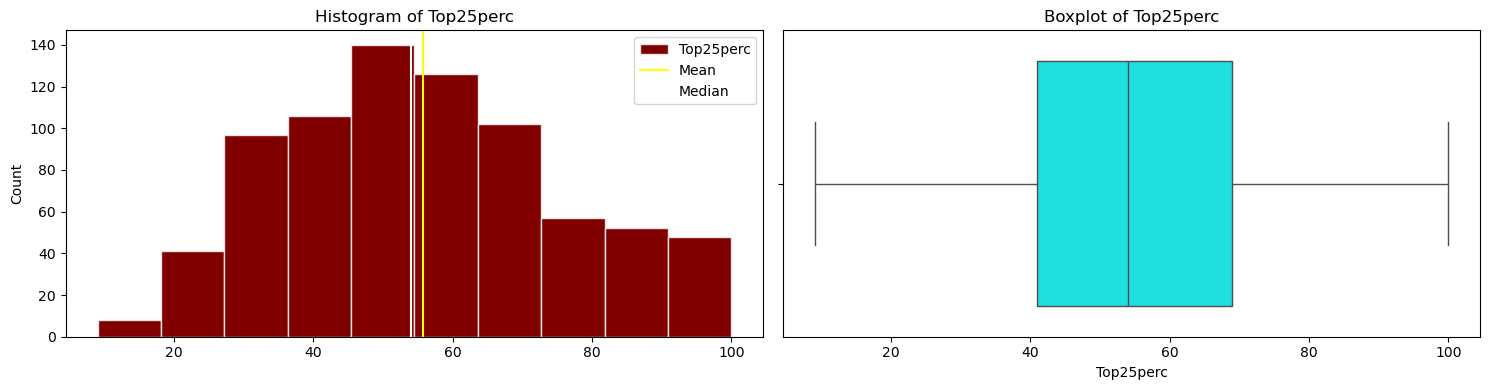

F.Undergrad
Skew : 2.61


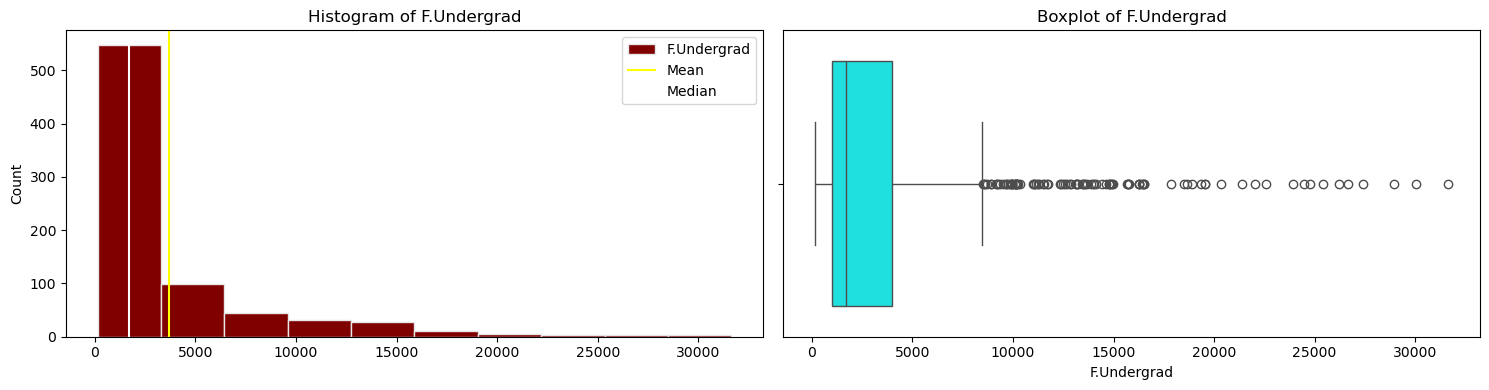

P.Undergrad
Skew : 5.69


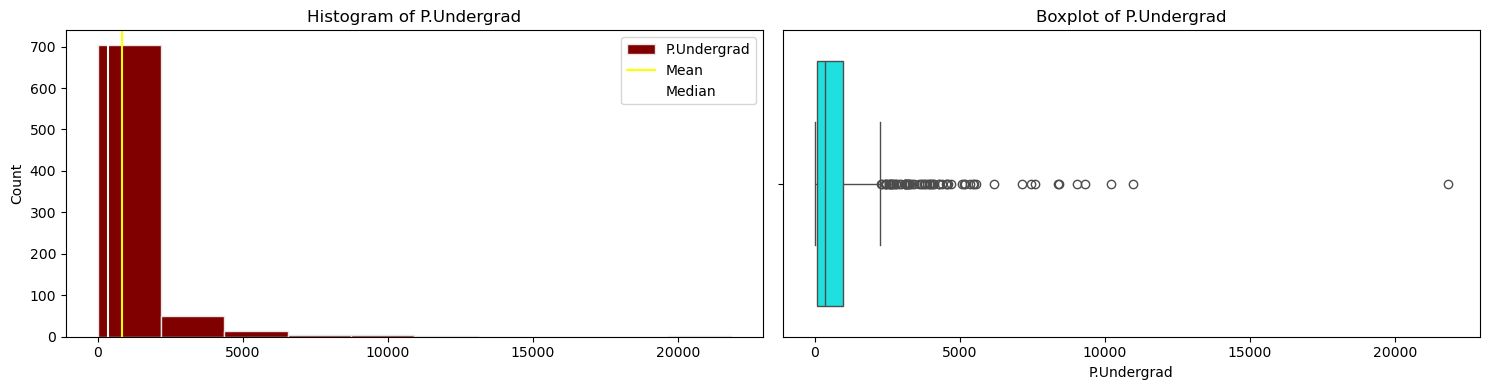

Outstate
Skew : 0.51


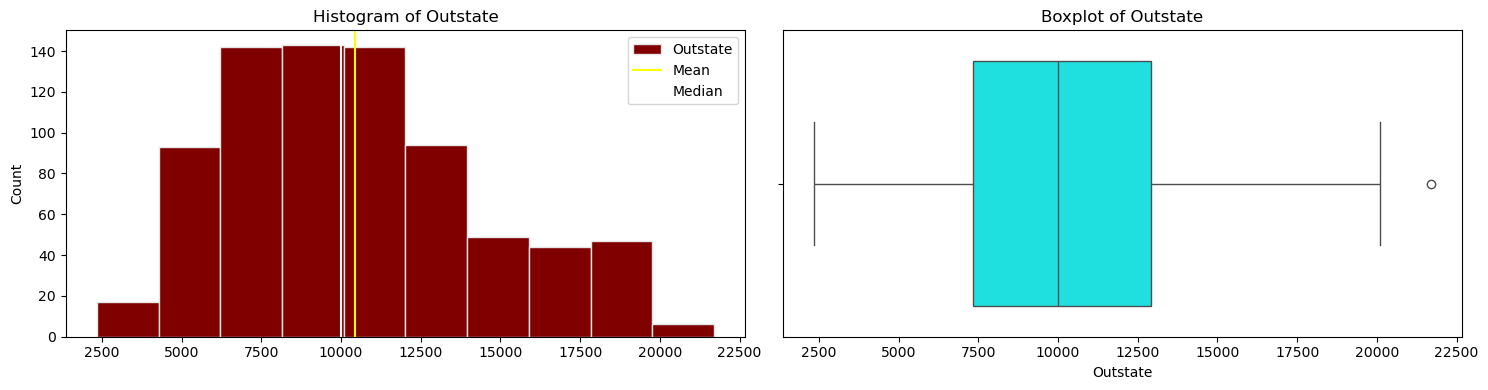

Room.Board
Skew : 0.48


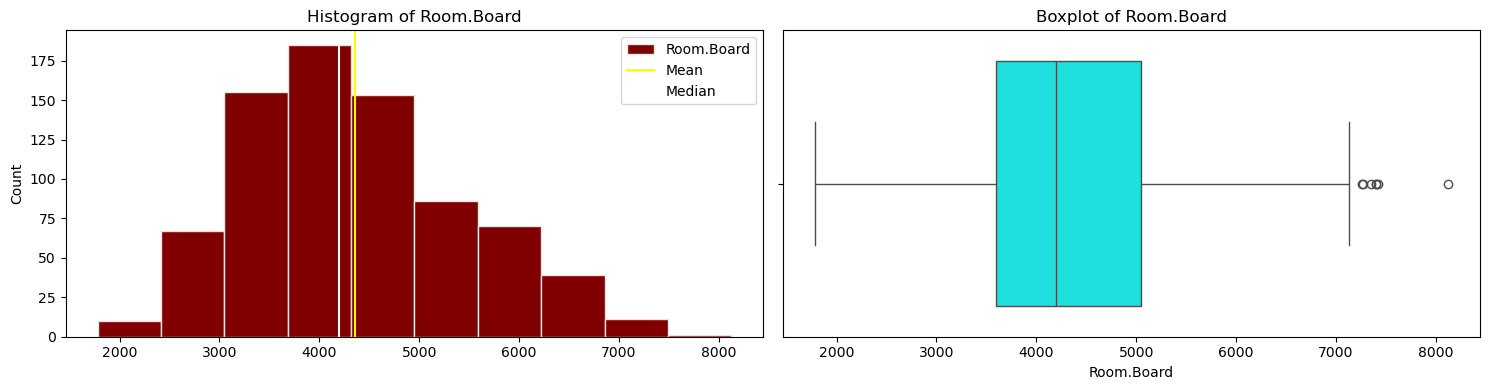

Books
Skew : 3.49


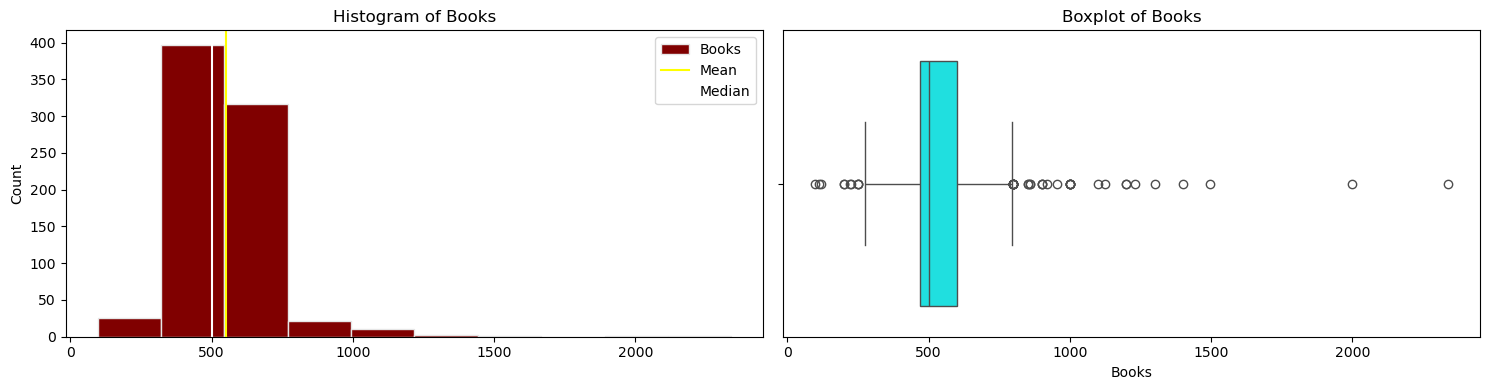

Personal
Skew : 1.74


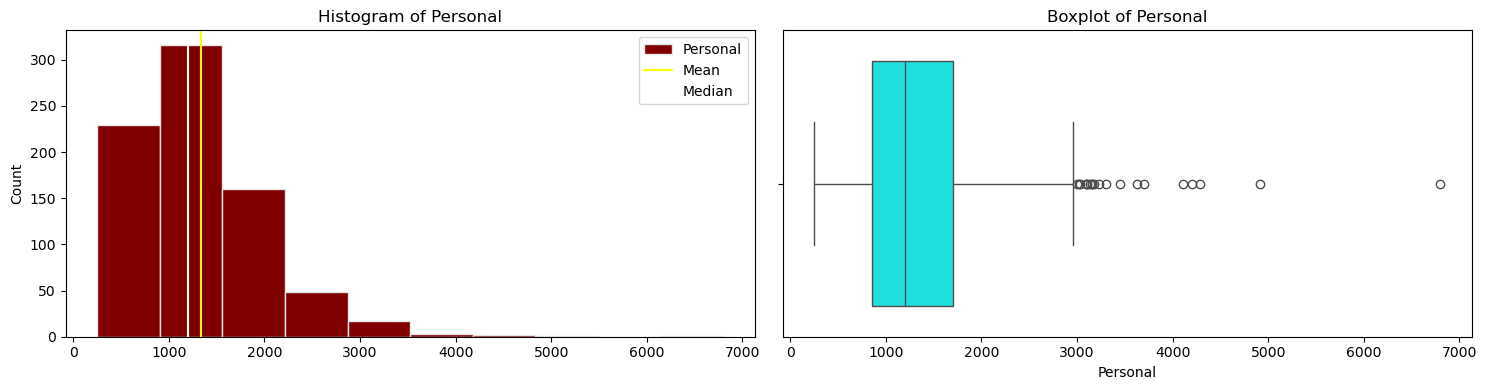

PhD
Skew : -0.77


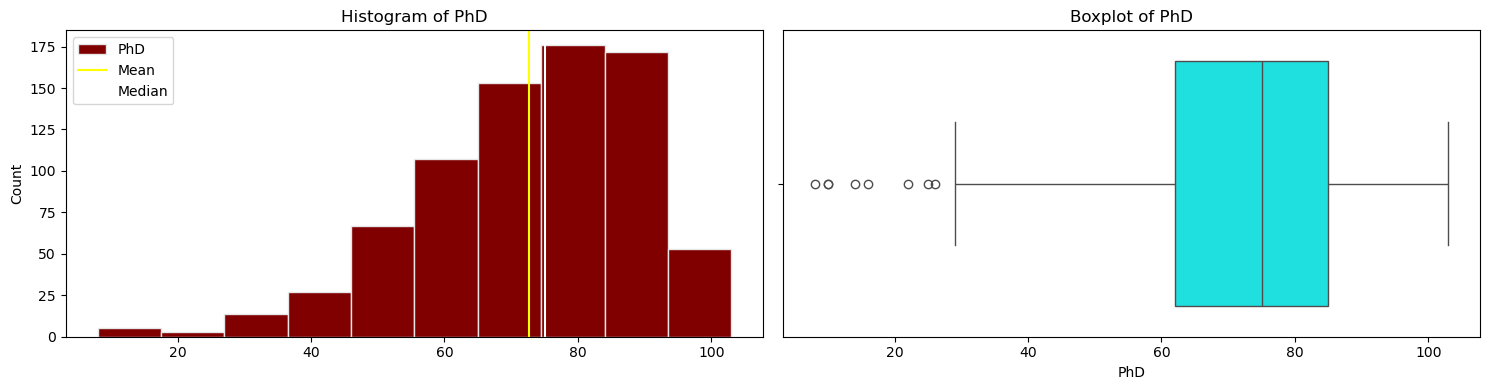

Terminal
Skew : -0.82


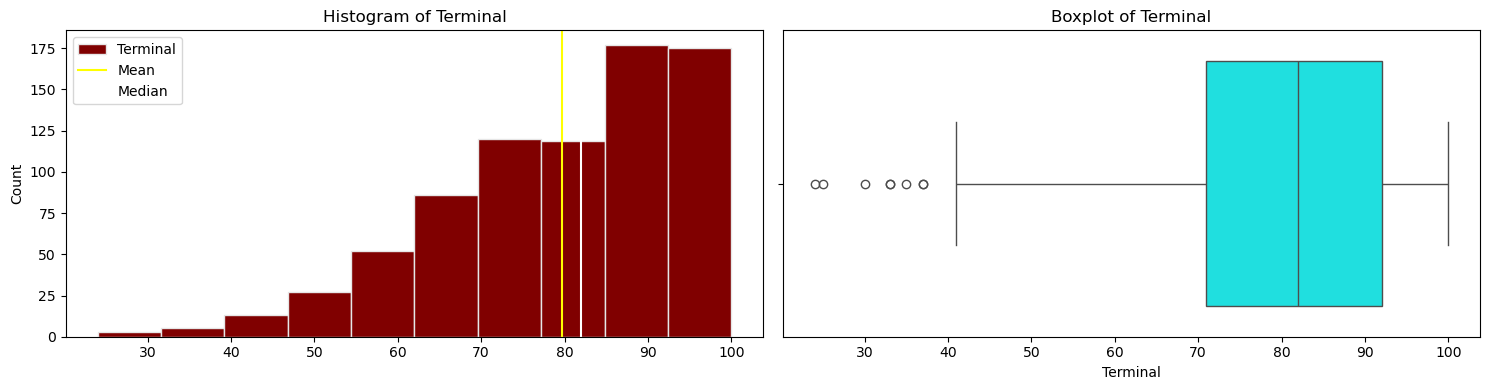

S.F.Ratio
Skew : 0.67


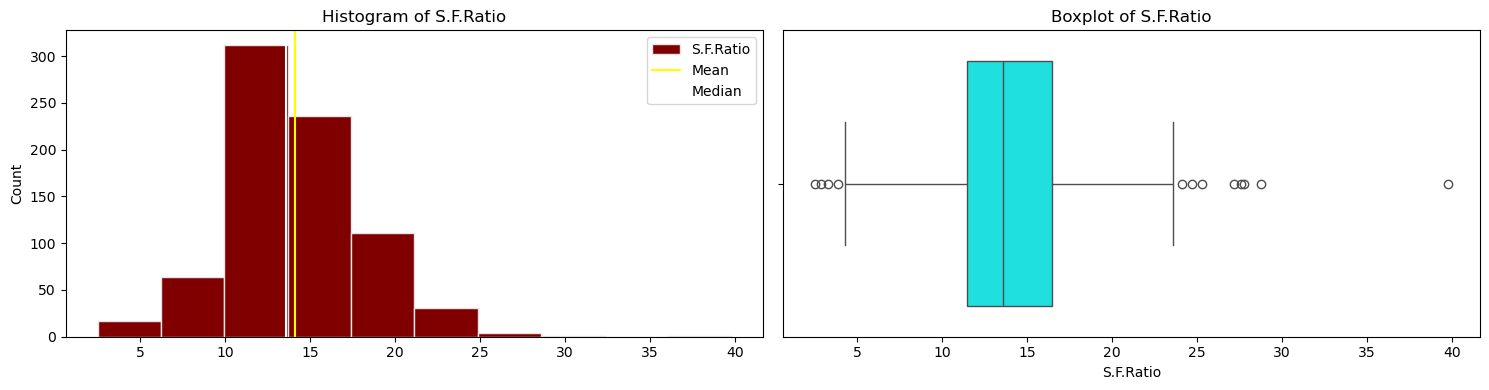

perc.alumni
Skew : 0.61


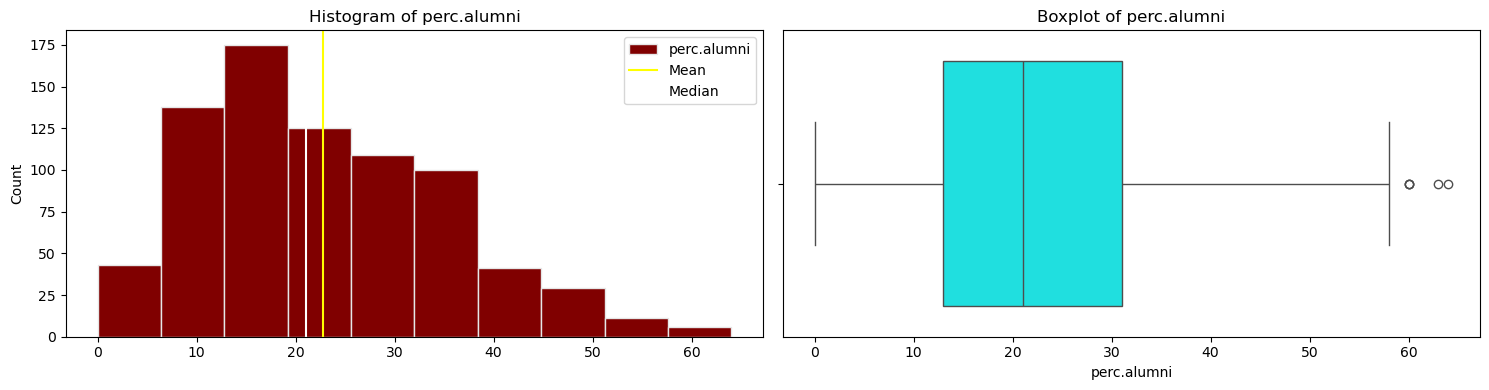

Expend
Skew : 3.46


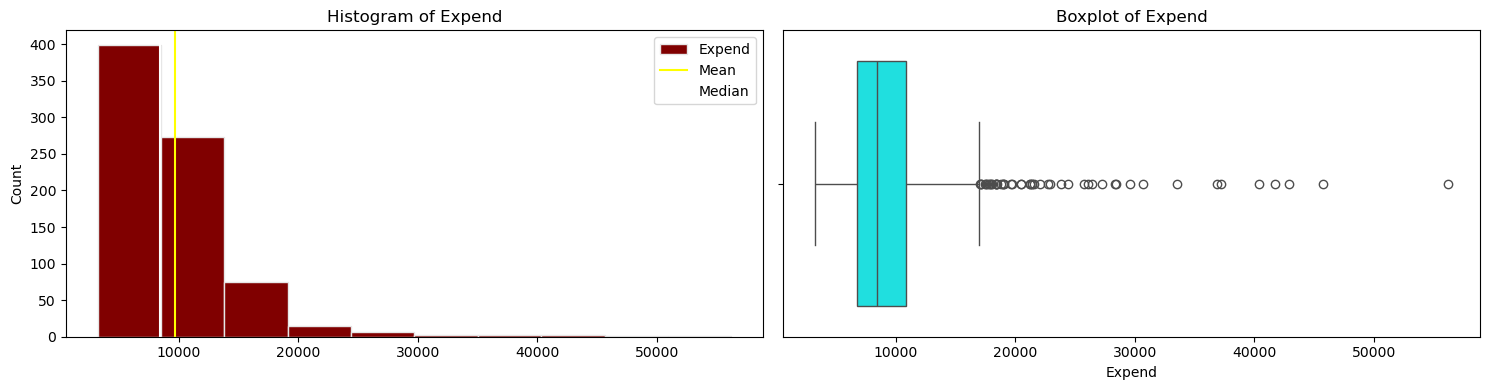

Grad.Rate
Skew : -0.11


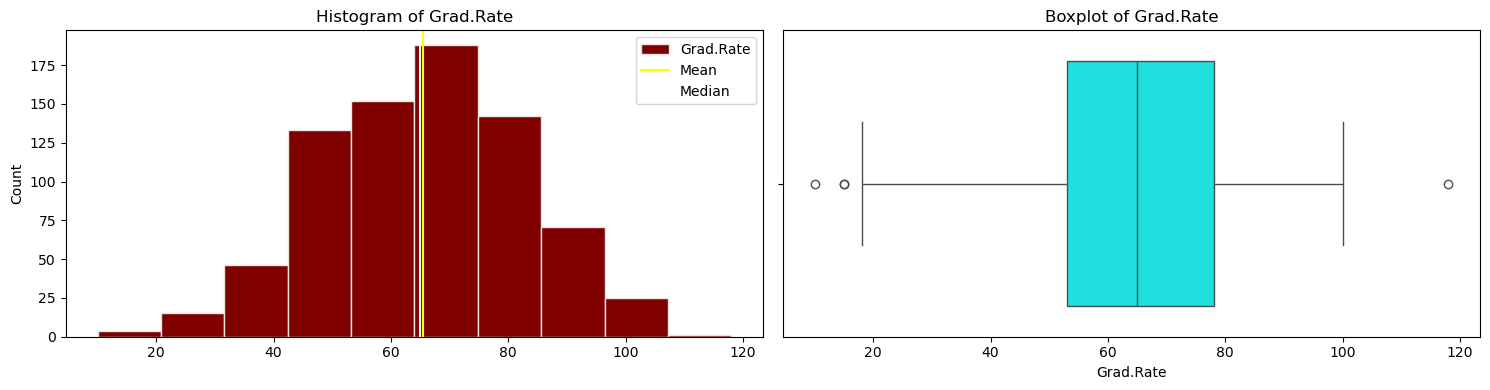

In [377]:
import matplotlib.pyplot as plt
import seaborn as sns

cont_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)

for col in cont_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    
    plt.figure(figsize=(15, 4))
    
    # Histogram with mean and median
    plt.subplot(1, 2, 1)
    df[col].plot(kind='hist', bins=10, edgecolor='#E6E6E6', color='Maroon')
    plt.axvline(df[col].mean(), color='Yellow', label='Mean')
    plt.axvline(df[col].median(), color='White', label='Median')
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='Cyan')
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.savefig('{}_PLOT.png'.format(col))  
    plt.show()




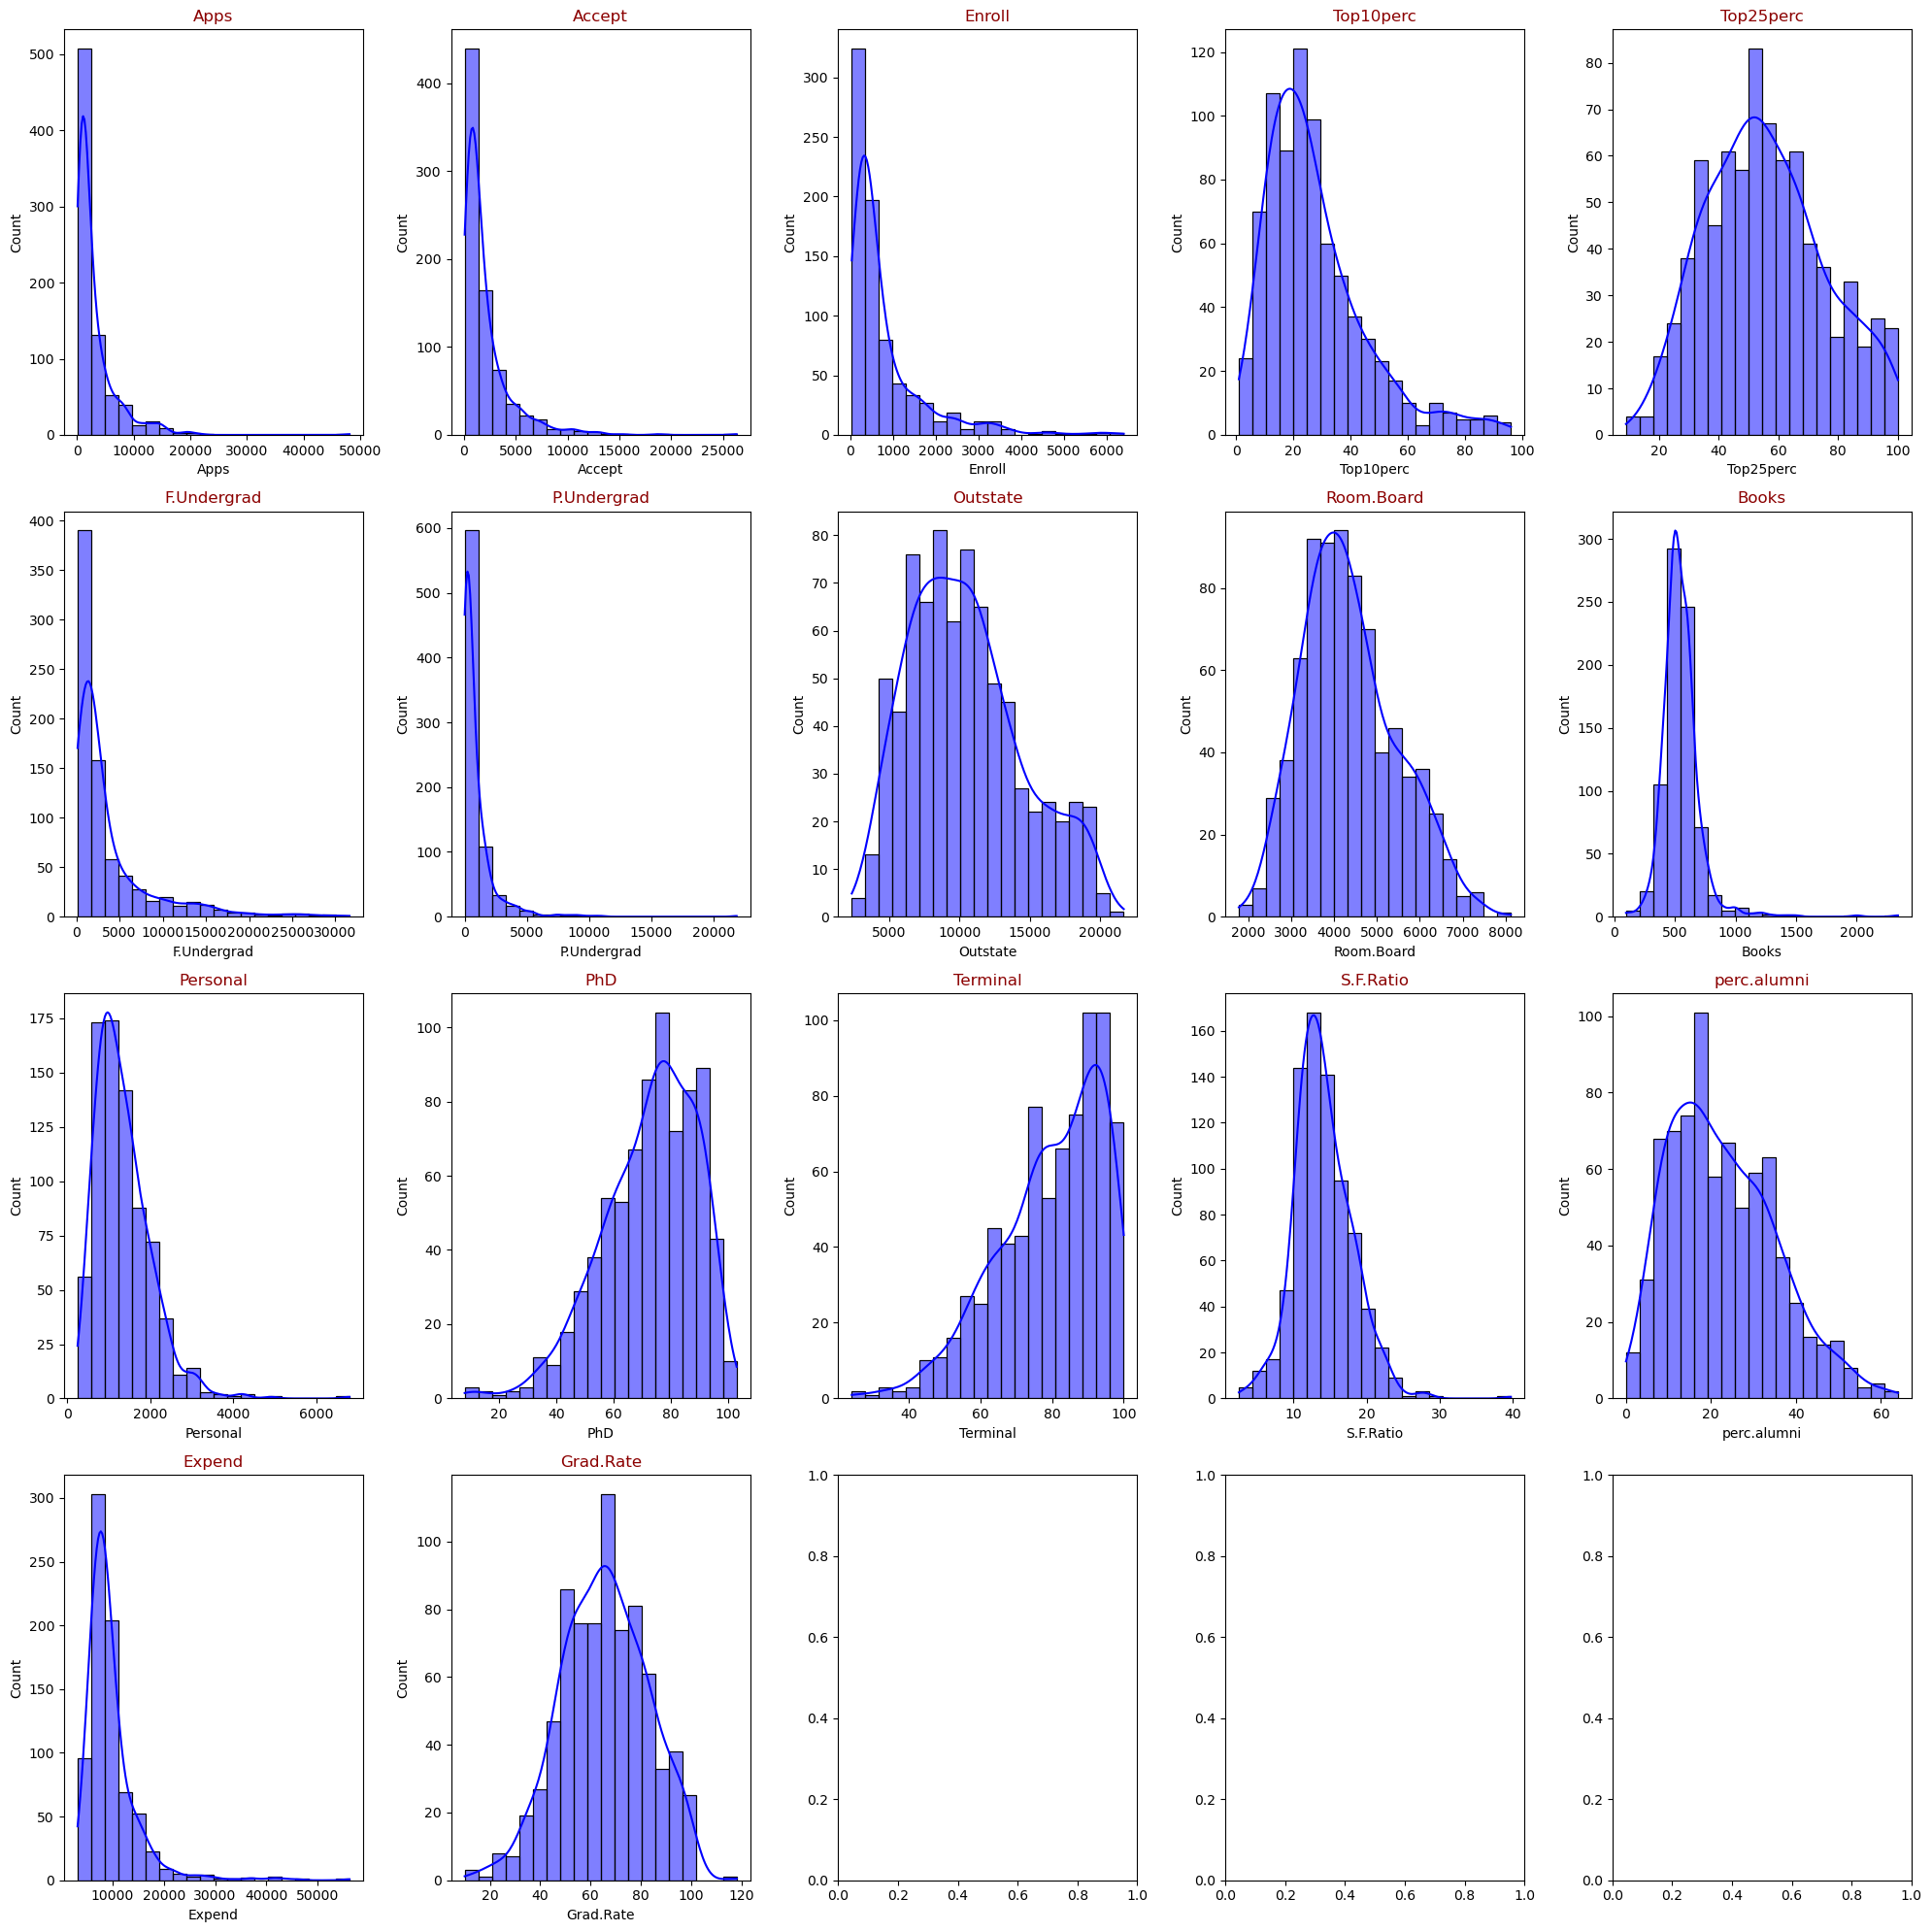

In [378]:
data_scatter = df.copy(deep=True)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))

for i, col in enumerate(data_scatter.columns):
    ax = axes[i // 5, i % 5]
    sns.histplot(data=data_scatter, x=col, bins=20, color='Blue', ax=ax, kde=True)  # Complete the code to show the distribution
    ax.set_title(col, color='DarkRed')

plt.tight_layout()
plt.show()


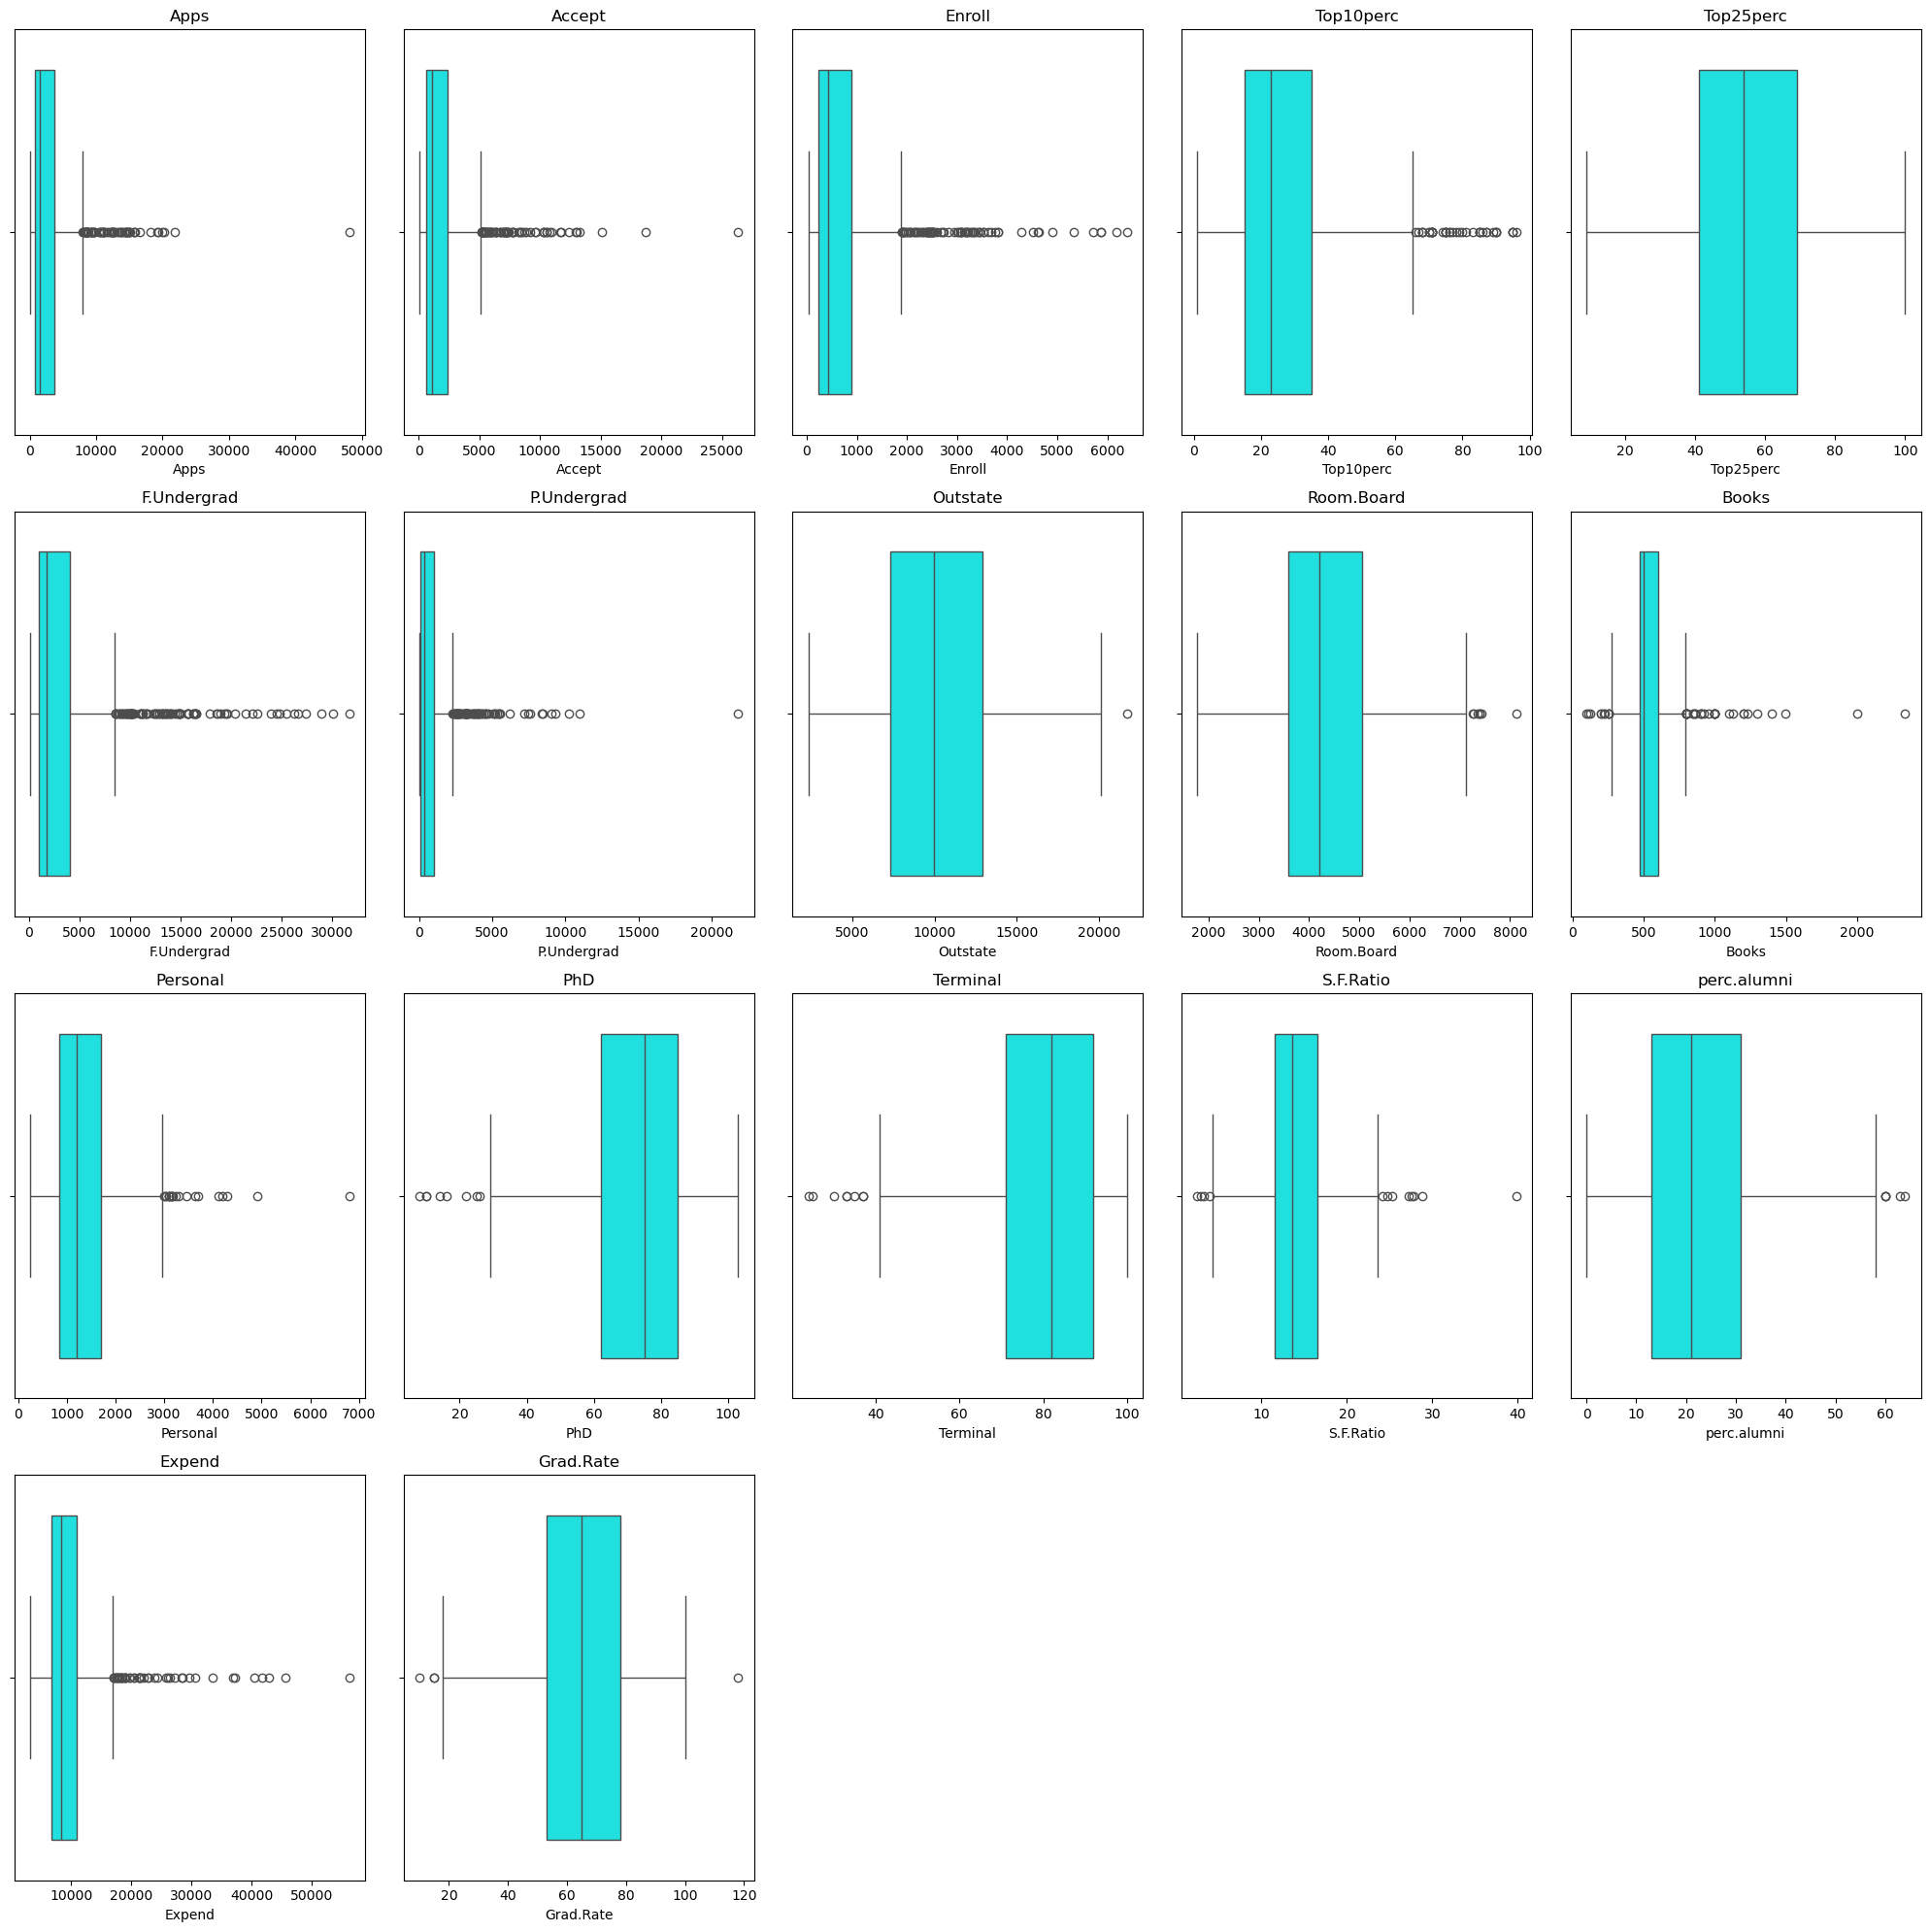

In [379]:
data_scatter = df.copy(deep=True)
fig = plt.figure(figsize=(20, 20))

for i in range(0, len(data_scatter.columns)):
    ax = fig.add_subplot(4, 5, i + 1)
    sns.boxplot(x=data_scatter[data_scatter.columns[i]], color='Cyan', ax=ax)  # Complete the code to build boxplot
    ax.set_title(data_scatter.columns[i], color='Black')

plt.tight_layout()
plt.show()


### Bivariate Analysis

Accept vs Apps


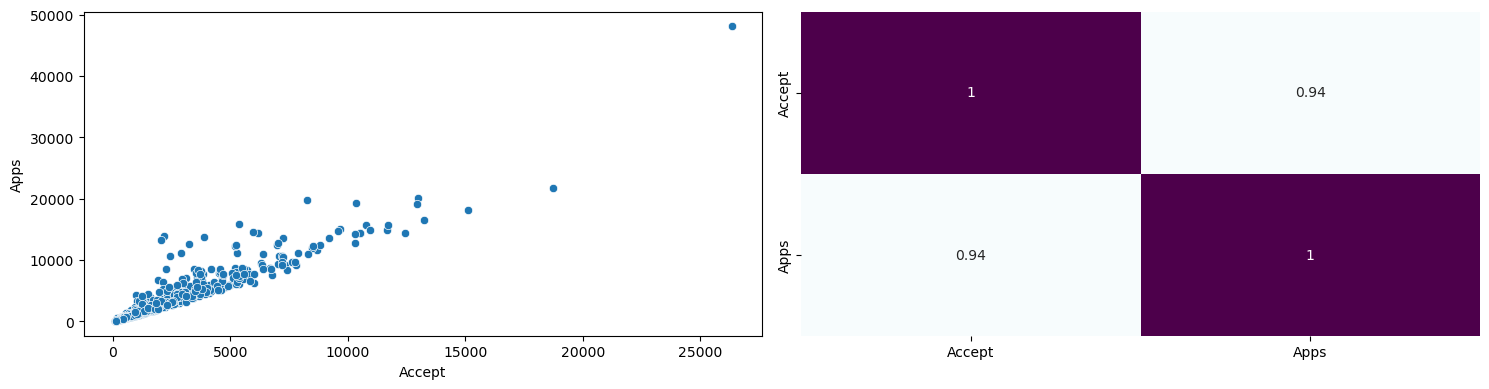

Enroll vs Accept


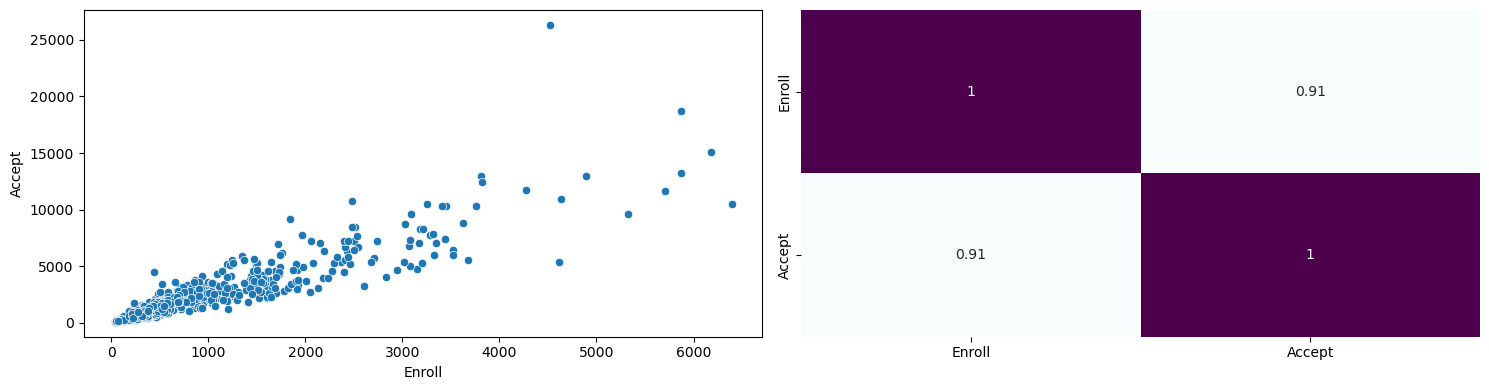

Top10perc vs Enroll


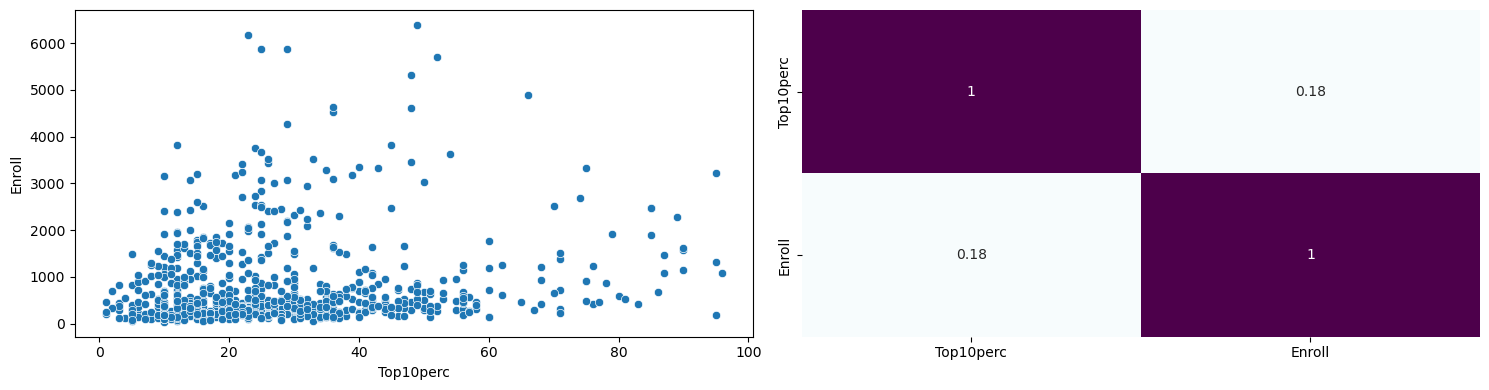

Top25perc vs Top10perc


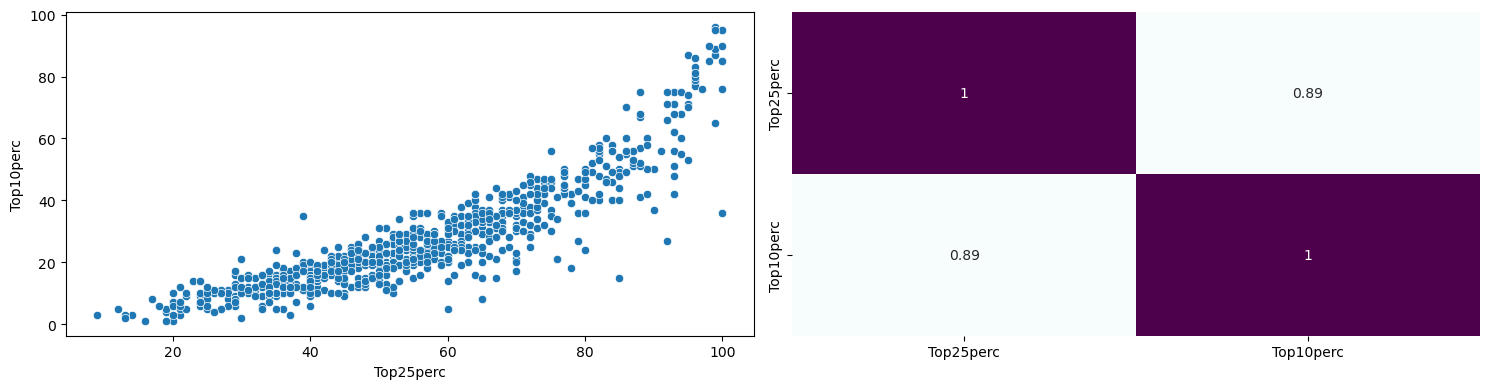

F.Undergrad vs Top25perc


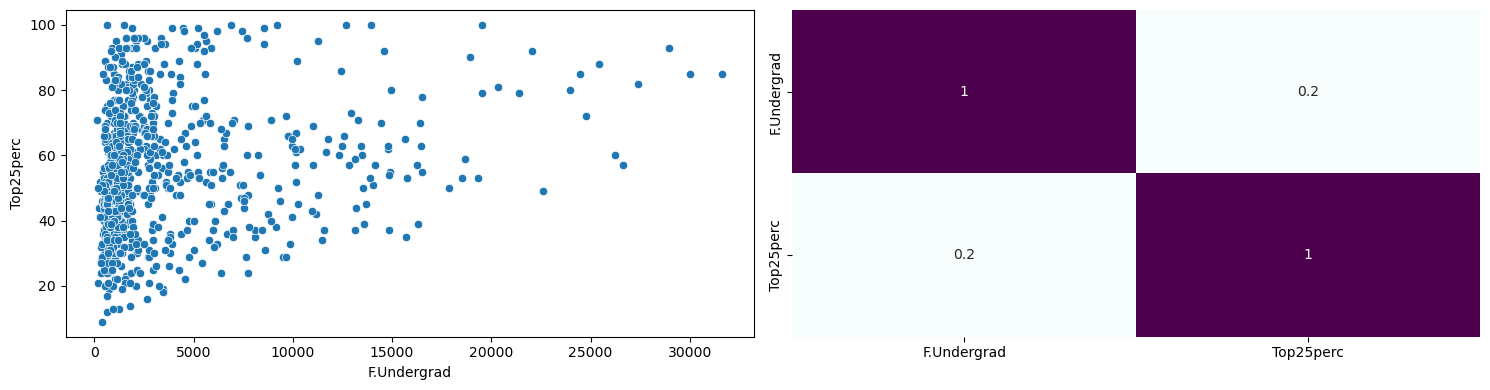

P.Undergrad vs F.Undergrad


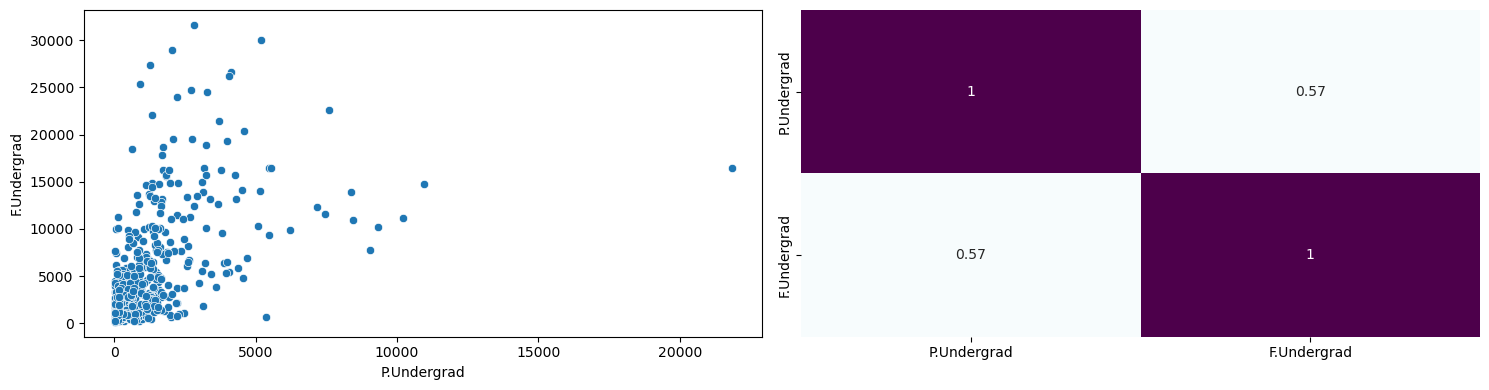

Outstate vs P.Undergrad


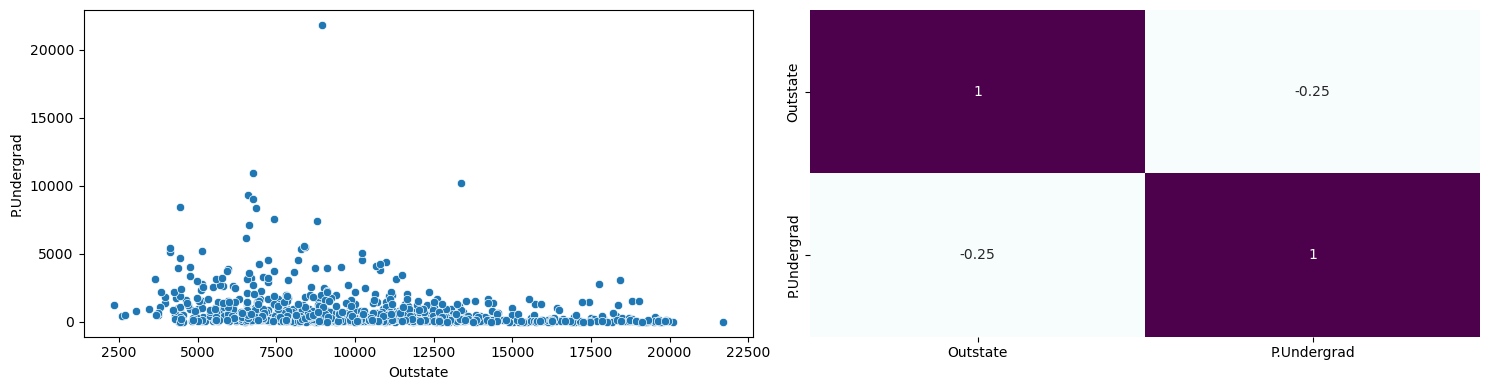

Room.Board vs Outstate


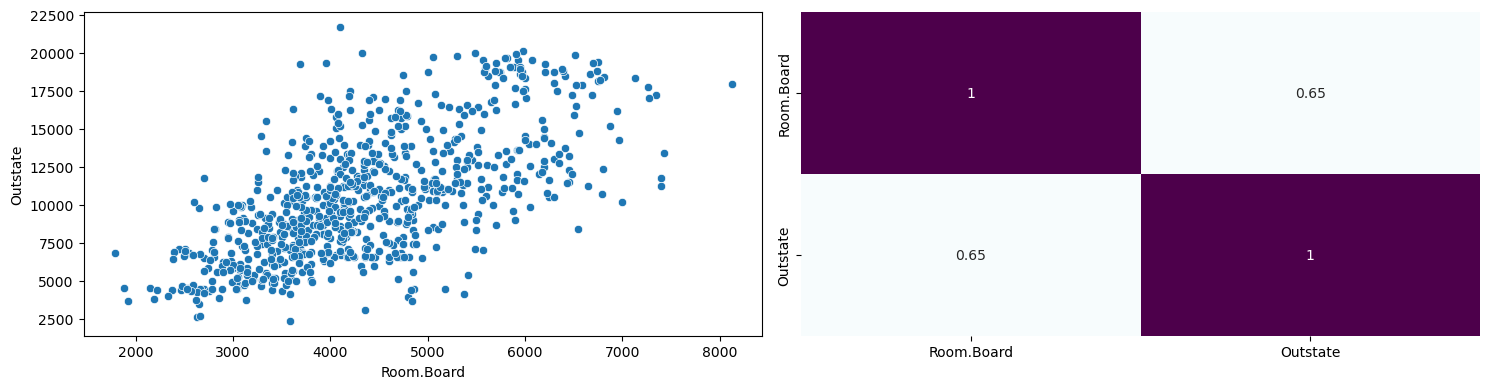

Books vs Room.Board


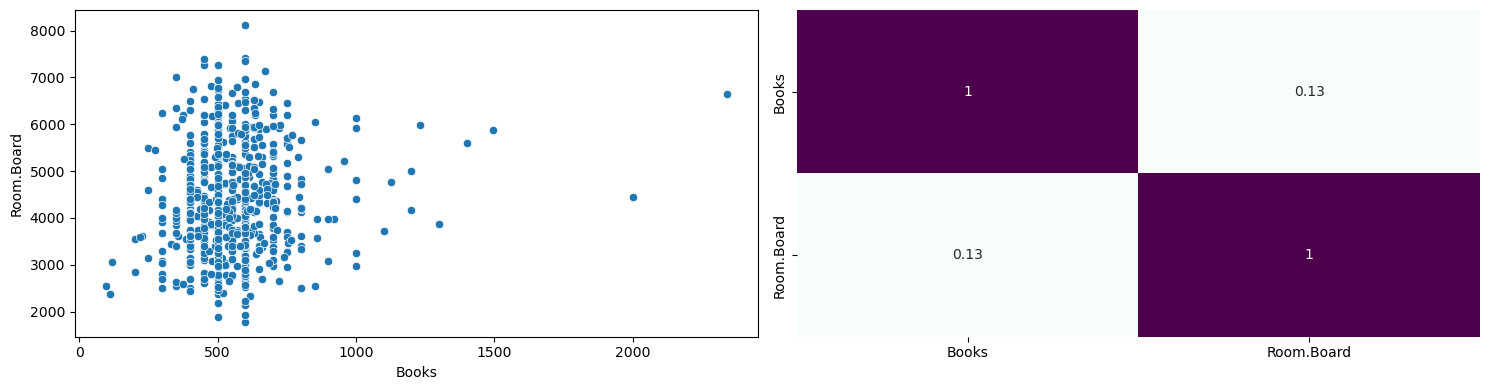

Personal vs Books


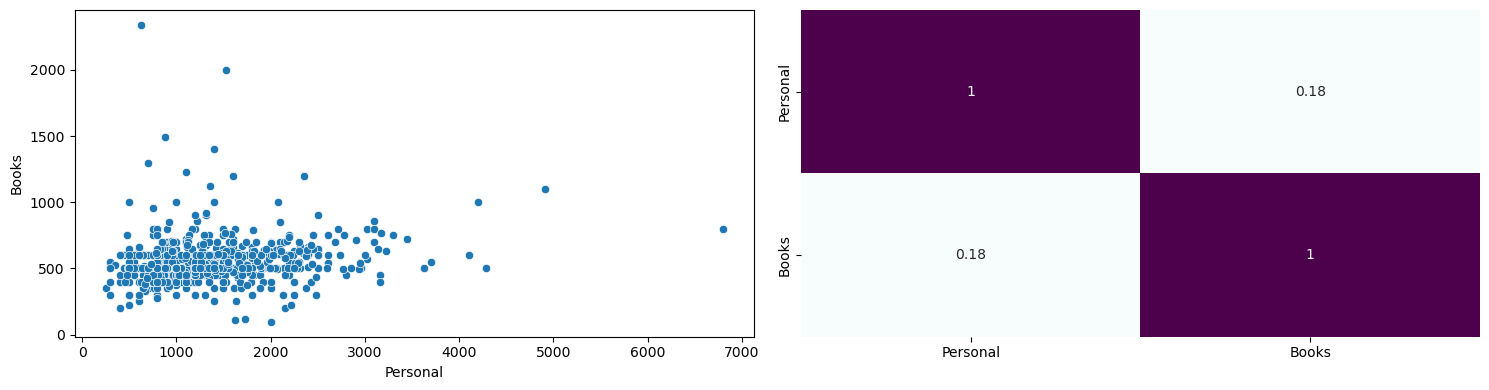

PhD vs Personal


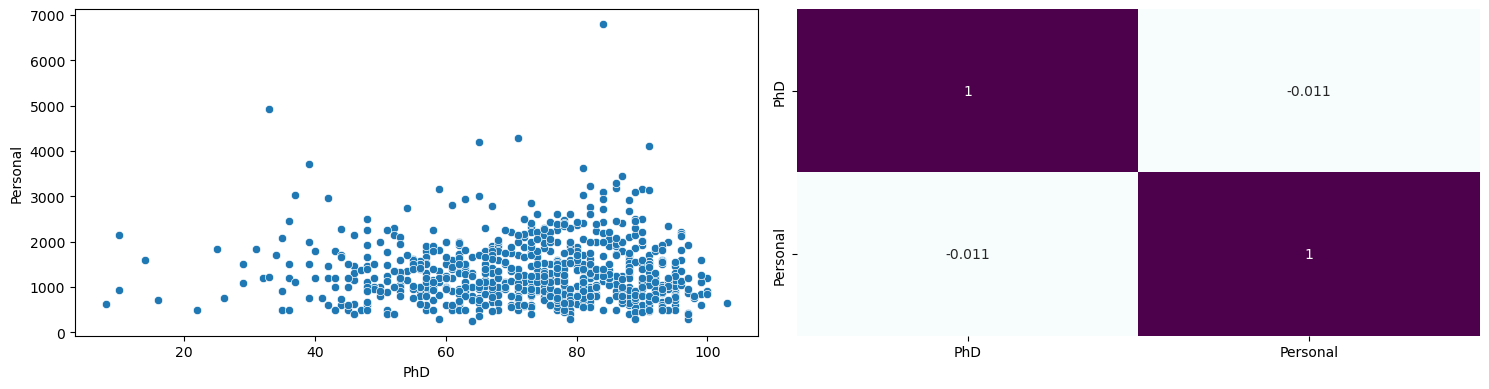

Terminal vs PhD


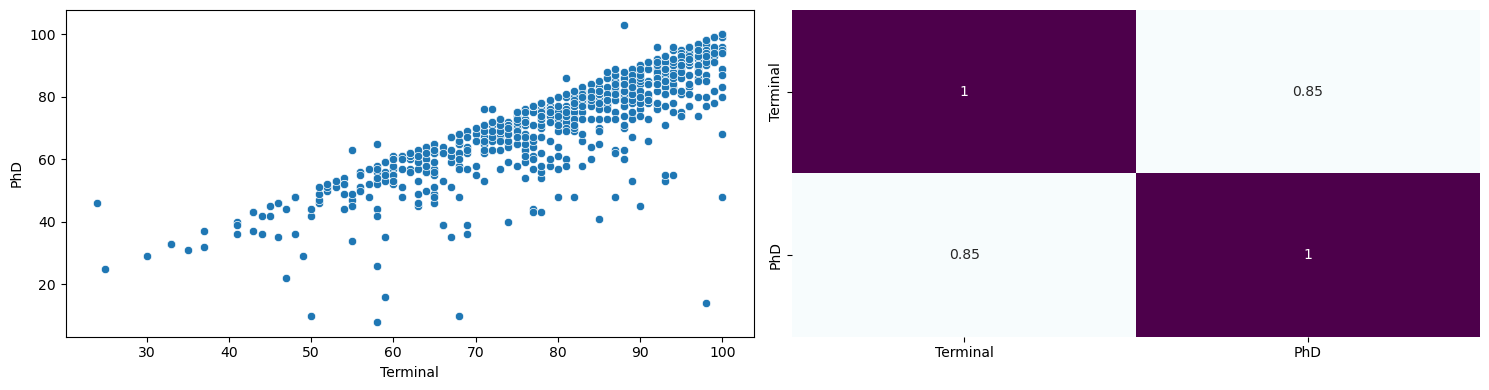

S.F.Ratio vs Terminal


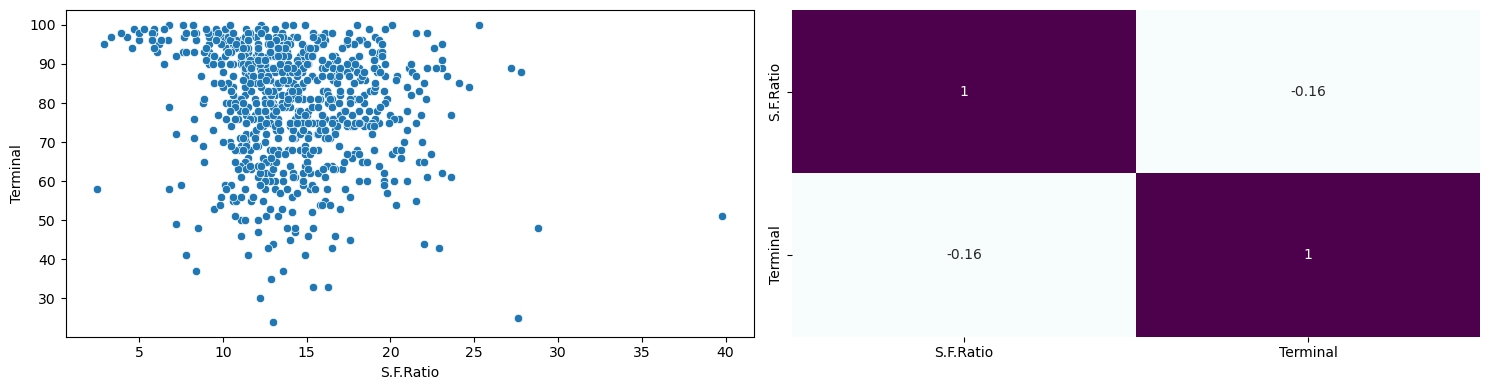

perc.alumni vs S.F.Ratio


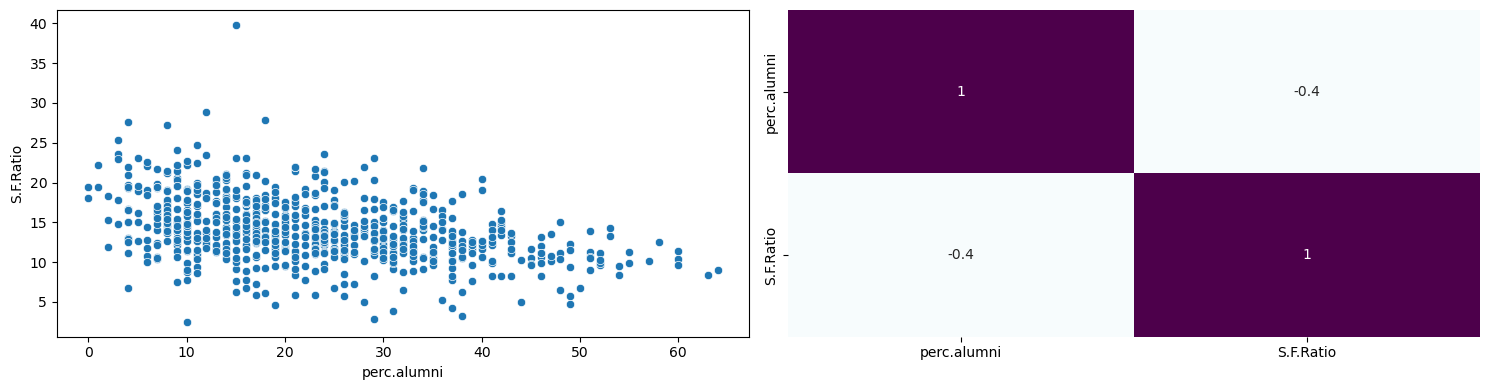

Expend vs perc.alumni


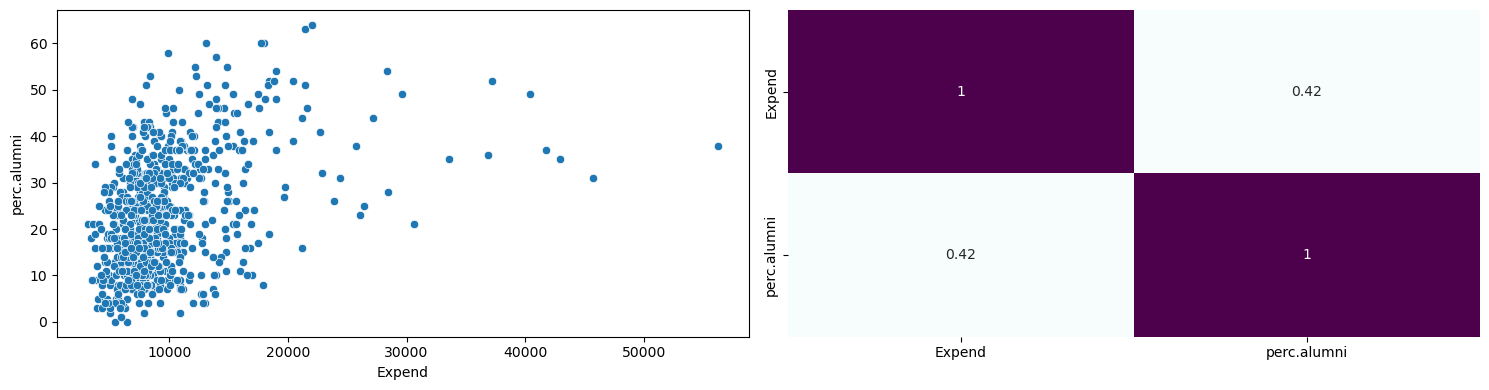

Grad.Rate vs Expend


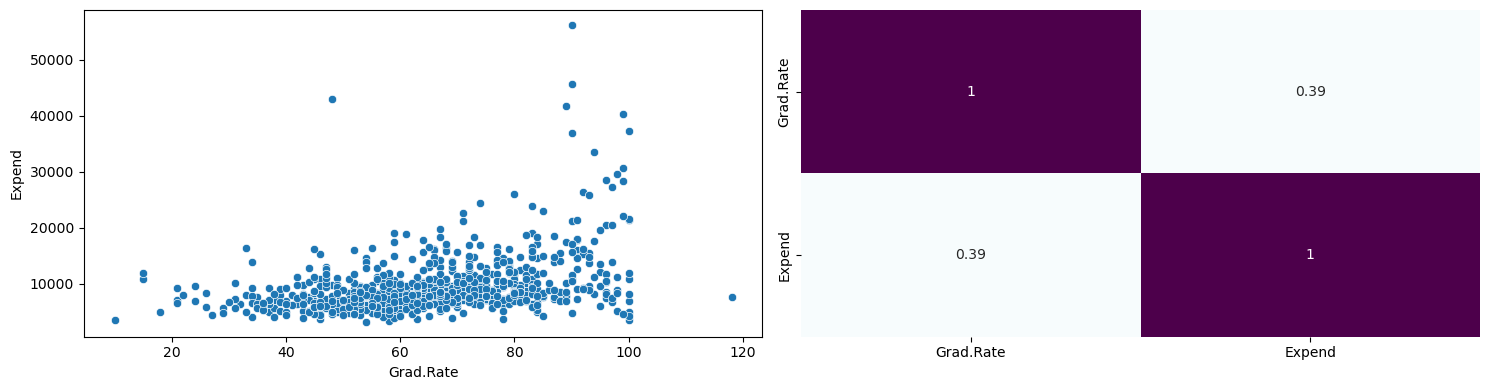

In [381]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("pastel")

cont_cols = list(df.columns)
for col in range(1, len(cont_cols)):
    print(cont_cols[col], 'vs', cont_cols[col-1])
    plt.figure(figsize=(15, 4))

    # Scatterplot
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df[cont_cols[col]], y=df[cont_cols[col - 1]]) ## Complete the code to build a scatterplot

    # Correlation heatmap
    plt.subplot(1, 2, 2)
    corr_matrix = np.corrcoef(df[cont_cols[col]], df[cont_cols[col - 1]])
    sns.heatmap(corr_matrix, annot=True,
                yticklabels=[cont_cols[col], cont_cols[col - 1]],
                xticklabels=[cont_cols[col], cont_cols[col - 1]],
                cmap='BuPu', cbar=False)

    plt.tight_layout()
    plt.show()


#### Is there any correlation between the columns?

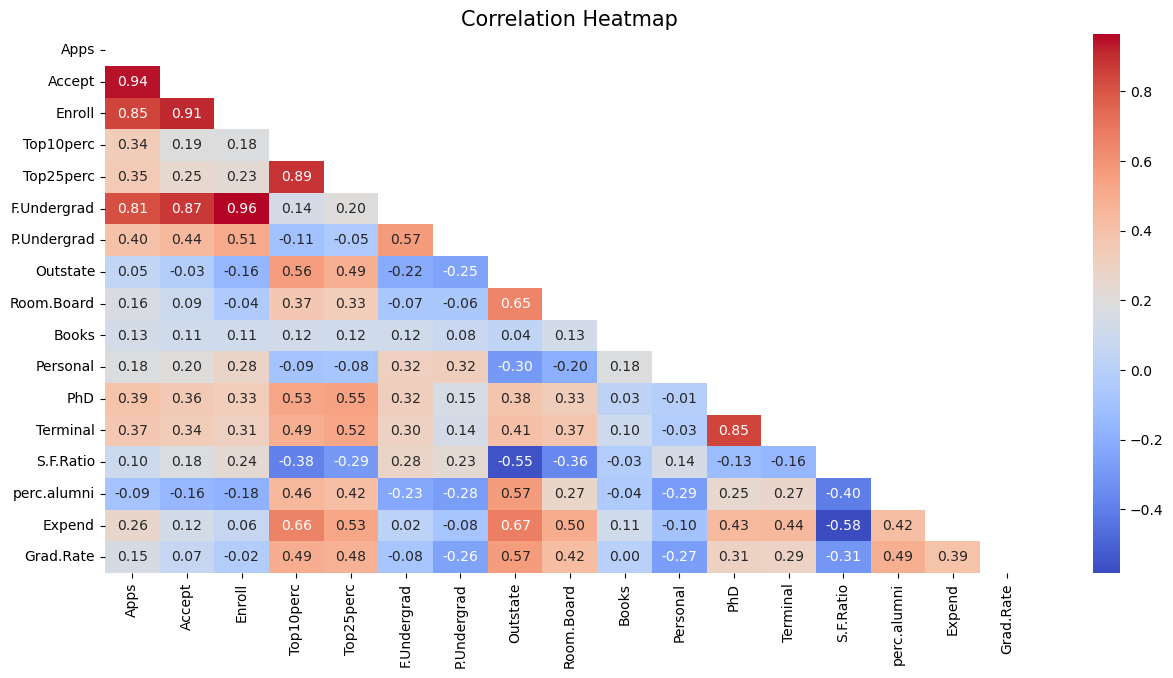

In [383]:
sns.color_palette("tab10")
plt.figure(figsize=(15, 7))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap", fontsize=15)
plt.show()


## Conclusions and Recommendations

#### Conclusions:

Through the detailed exploratory data analysis (EDA) of the dataset, we’ve drawn several insights that reflect the characteristics, strengths, and areas of concern in the post-12th education landscape:

1. Application vs Enrollment Dynamics

here is significant variation in the number of applications received, with some institutions receiving over 48,000 applications.

However, the conversion rate from applications to enrollments is highly inconsistent, suggesting that student decision-making and college offerings are misaligned in some cases.

2. Academic Excellence Indicators

The average percentage of students from the top 10% of high school class is ~28%, indicating most colleges attract a mix of top-performing and average students.

Some elite colleges admit as high as 96% top 10% students, showing clear segmentation in college prestige.


3. Faculty Strength

On average, 73% of faculty members hold PhDs, and 80% have terminal degrees, indicating a generally well-qualified teaching staff.

However, some institutions fall significantly short, potentially impacting education quality and student outcomes.

4. Cost of Education
   
Out-of-state tuition, room & board, and personal expenses vary widely, with some students facing costs over $20,000 per year.

High cost does not always correlate with better graduation rates, implying inefficiency or poor value in some colleges.


5. Student-Faculty Ratio

While most colleges maintain a ratio around 14:1, some go up to 39.8:1, which can dilute academic support and personalized attention.


6. Graduation Rate
   
Average graduation rate is 65%, but some colleges report values >100%, indicating possible data inconsistencies or rounding errors.

Correlation analysis shows strong positive correlation of graduation rate with:

    perc.alumni (alumni donations — possibly a proxy for student satisfaction)
    Expend (instructional expenditure)
    Top10perc (admitted student quality)


#### Recommendations:

1. Focus on Faculty-Student Ratio
   
Invest in hiring more qualified faculty, especially in colleges where S.F.Ratio > 20, to improve student outcomes and engagement.


2. Targeted Scholarships
   
Provide scholarships or tuition subsidies in colleges with high Outstate tuition but poor graduation rates, to improve accessibility and reduce dropout rates.

3. Boost Alumni Engagement
   
As perc.alumni shows positive correlation with Grad.Rate, institutions should create stronger alumni relations programs, mentorship initiatives, and donation incentives.


4. Curriculum Investment
   
Increase instructional expenditure per student in underperforming colleges, especially where expenditure is below average but student body quality is decent.


5. Track and Fix Data Quality
   
Graduation rates above 100% suggest reporting or recording issues — data auditing is needed for such institutions.


6. Build on Strong Correlations

Use variables such as Top10perc, Expend, and perc.alumni in predictive models to identify at-risk institutions and design interventions.




___